# 🚀**Spaceship Titanic : 가상 차원 전송 승객 예측 모델 만들기**

**목차**
1. [소개](#introduce_section)
2. [데이터셋 가져오기](#dataset_section)
3. [탐색적 데이터 분석(EDA)](#eda_section)
4. [특성 엔지니어링](#feature_section)
5. [데이터 전처리](#preprocessing_section)
6. [머신러닝 모델 구축 및 평가](#model_section)
7. [제출](#submission_section)


In [1]:
# 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

<a id="introduce_section"></a>
# **소개**
2912년에 오신 것을 환영합니다. 당신의 데이터 과학 기술은 우주의 미스터리를 풀기 위해 꼭 필요합니다. 우리는 4광년 떨어진 곳으로부터 전송을 받았는데, 상황이 그리 좋지 않아 보입니다.

**스페이스쉽 타이타닉**은 한 달 전 발사된 성간 여객선입니다. 약 13,000명의 승객을 태운 이 배는 우리 태양계에서 인근 별 주위를 공전하는 세 개의 새로운 거주 가능 외계 행성으로 이주민들을 실어 나르는 첫 항해를 시작했습니다.

첫 번째 목적지인 뜨거운 '55 Cancri E'로 향하던 중, 알파 센타우리를 선회하던 스페이스쉽 타이타닉은 먼지 구름 속에 숨겨진 **시공간 이상 현상(Spacetime Anomaly)**과 충돌했습니다. 안타깝게도 1,000년 전의 이름과 같은 배처럼 비극적인 운명을 맞이했습니다. 비록 배 자체는 온전했지만, **승객의 거의 절반이 다른 차원으로 전송되었습니다!**

구조대원들이 잃어버린 승객들을 되찾을 수 있도록 돕기 위해, 당신은 손상된 우주선 컴퓨터 시스템에서 복구된 기록을 사용하여 **어떤 승객이 이상 현상에 의해 전송되었는지 예측**해야 합니다.

그들을 구하고 역사를 바꿔주세요!


<a id="dataset_section"></a>
# **데이터셋 가져오기**

In [3]:
# Pandas 데이터프레임으로 train 데이터셋 불러오기
train_df = pd.read_csv('C:/Users/User/Desktop/Github/sklearn-est15th-realfinal/Spaceship_Titanic/train.csv')
train_row = train_df.shape[0]
train_col = train_df.shape[1]
print(f"✅ 트레인 데이터셋 로드 완료")
print(f"train 데이터셋의 크기는 {train_df.shape}입니다.")
print(f"승객은 {train_row}명, feature는 {train_col}개입니다.")

✅ 트레인 데이터셋 로드 완료
train 데이터셋의 크기는 (8693, 14)입니다.
승객은 8693명, feature는 14개입니다.


In [4]:
# Pandas 데이터프레임으로 test 데이터셋 불러오기
test_df = pd.read_csv('C:/Users/User/Desktop/Github/sklearn-est15th-realfinal/Spaceship_Titanic/test.csv')
test_row = test_df.shape[0]
test_col = test_df.shape[1]
print(f"✅ 테스트 데이터셋 로드 완료")
print(f"test 데이터셋의 크기는 {test_df.shape}입니다.")
print(f"승객은 {test_row}명, feature는 {test_col}개입니다.")

✅ 테스트 데이터셋 로드 완료
test 데이터셋의 크기는 (4277, 13)입니다.
승객은 4277명, feature는 13개입니다.


In [5]:
# 정답을 안전한 별도의 복사본에 보관
y_train = train_df['Transported'].copy()

# 나중에 분리할 기준점 저장
ntrain = train_df.shape[0]

# 통합 데이터셋 생성 (정답은 빼고 합치기)
all_data = pd.concat([train_df.drop('Transported', axis=1), test_df], axis=0, ignore_index=True)

In [6]:
all_data.shape

(12970, 13)

In [7]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [8]:
all_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [9]:
# Target인 Transported 확인
print(f'합쳐진 데이터 크기: 행:{all_data.shape[0]}, 열:{all_data.shape[1]}')
print('전송 여부(Transported)')
print(y_train.value_counts(dropna = False))

합쳐진 데이터 크기: 행:12970, 열:13
전송 여부(Transported)
Transported
True     4378
False    4315
Name: count, dtype: int64


<a id="eda_section"></a>
# **탐색적 데이터 분석(EDA)**

### 각 **feature**의 이름과 의미
- **PassengerId**: 승객 고유 ID. `gggg_pp` 형태입니다.
    
    - `gggg`: 함께 여행하는 **그룹** 번호 (주로 가족이지만 아닐 수도 있음).
        
    - `pp`: 그룹 내에서의 번호.
        
- **HomePlanet**: 승객이 출발한 행성 (보통 거주지).
    
- **CryoSleep**: 항해 동안 **냉동 수면(동면)** 상태를 선택했는지 여부(True/False). 동면 중인 승객은 객실 밖으로 나올 수 없습니다.
    
- **Cabin**: 승객이 머무는 객실 번호. `deck/num/side` 형태입니다.
    
    - `side`: `P` (좌현, Port) 또는 `S` (우현, Starboard).
        
- **Destination**: 승객이 내릴 목적지 행성.
    
- **Age**: 승객의 나이.
    
- **VIP**: 항해 중 특별 VIP 서비스를 신청했는지 여부(True/False).
    
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: 우주선의 여러 편의시설에서 사용한 **금액**.
    
- **Name**: 승객의 이름과 성.
    
- **Transported**: 다른 차원으로 전송되었는지 여부. **Target**.

In [10]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
# 결측치 갯수 확인
NaN_counts = train_df.isnull().sum().sort_values(ascending = False)
NaN_counts

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [13]:
# 결측치를 전체데이터 대비 퍼센테이지로 계산
percent = (train_df.isnull().sum()*100/train_df.shape[0]).sort_values(ascending = False)
percent

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64

In [14]:
train_df.describe().round()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.0,8512.0,8510.0,8485.0,8510.0,8505.0
mean,29.0,225.0,458.0,174.0,311.0,305.0
std,14.0,667.0,1611.0,605.0,1137.0,1146.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.0,0.0,0.0,0.0,0.0,0.0
50%,27.0,0.0,0.0,0.0,0.0,0.0
75%,38.0,47.0,76.0,27.0,59.0,46.0
max,79.0,14327.0,29813.0,23492.0,22408.0,24133.0


In [15]:
# 문자 데이터만 보기
# count: 응답자 수, unique: 중복 제거 후 종류 갯수, top: 최빈값, freq: top의 빈도수
train_df.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [16]:
# 몇 명이 전송됐는지 숫자로 확인하기
print(train_df['Transported'].value_counts())

# 비율로 확인하기
print("\n[전송 비율]")
print(train_df['Transported'].value_counts(normalize=True))

Transported
True     4378
False    4315
Name: count, dtype: int64

[전송 비율]
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


<Axes: xlabel='Transported'>

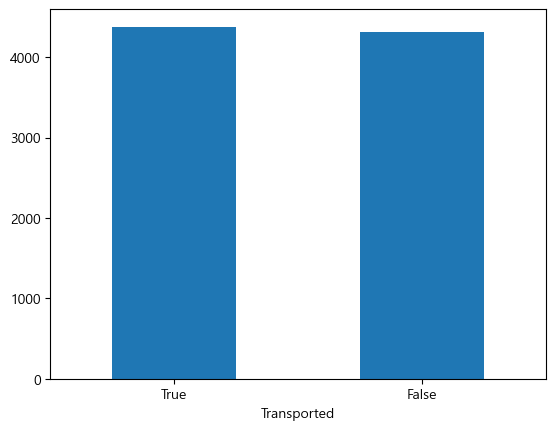

In [17]:
# 전송 비율 그래프로 시각화
plot_df = train_df.Transported.value_counts()
plot_df.plot(kind="bar", rot=0)

## 1. 동면 여부(CryoSleep)

In [18]:
# 동면 인원수 확인
train_df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [19]:
# 동면 여부별로 전송 비율
sleep_ratio = train_df.groupby('CryoSleep')['Transported'].value_counts(normalize=True).unstack()
print(sleep_ratio)

Transported     False     True 
CryoSleep                      
False        0.671079  0.328921
True         0.182417  0.817583


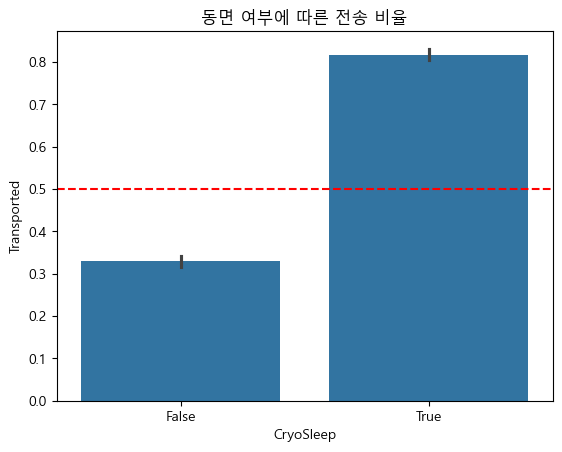

In [20]:
# 동면 여부에 따른 전송 비율 시각화
sns.barplot(data=train_df, x='CryoSleep', y='Transported')
plt.title('동면 여부에 따른 전송 비율')
plt.axhline(0.5, color='red', linestyle='--')
plt.show()

동면하고 있는 사람이 전송될 확률은 81%로 매우 높고, 깨어나 있는 사람이 전송될 확률은 32%로 낮은 것을 알 수 있습니다.

## 2. 승객 나이(Age)

In [21]:
# 나이대 변수 만들기
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=range(0, 81, 4))

# 나이대별 전송 비율 계산 
age_ratio = train_df.groupby('AgeGroup', observed=False)['Transported'].value_counts(normalize=True).unstack()

# 결과 출력
print(age_ratio)

Transported     False     True 
AgeGroup                       
(0, 4]       0.256944  0.743056
(4, 8]       0.409357  0.590643
(8, 12]      0.378698  0.621302
(12, 16]     0.449225  0.550775
(16, 20]     0.510496  0.489504
(20, 24]     0.559934  0.440066
(24, 28]     0.496625  0.503375
(28, 32]     0.552826  0.447174
(32, 36]     0.500741  0.499259
(36, 40]     0.536424  0.463576
(40, 44]     0.494908  0.505092
(44, 48]     0.491329  0.508671
(48, 52]     0.552239  0.447761
(52, 56]     0.524590  0.475410
(56, 60]     0.456790  0.543210
(60, 64]     0.495575  0.504425
(64, 68]     0.527273  0.472727
(68, 72]     0.538462  0.461538
(72, 76]     0.611111  0.388889
(76, 80]     0.750000  0.250000


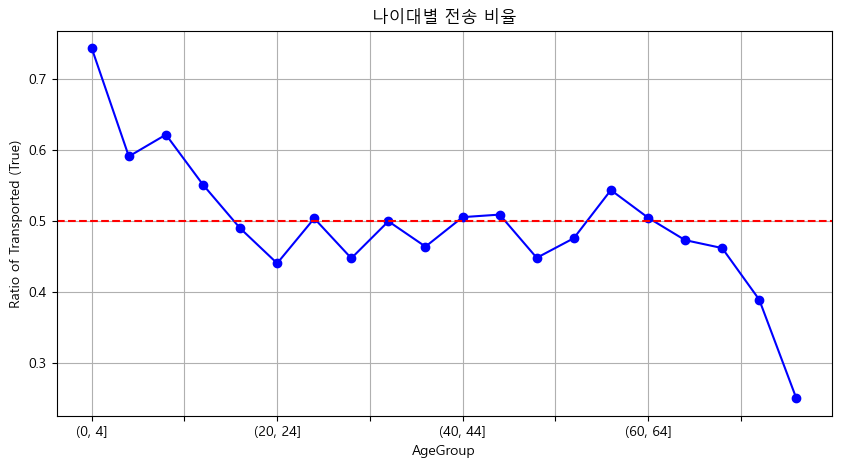

In [22]:
# 시각화
age_ratio[True].plot(kind='line', marker='o', figsize=(10, 5), color='blue')
plt.axhline(0.5, color='red', linestyle='--')
plt.title('나이대별 전송 비율')
plt.ylabel('Ratio of Transported (True)')
plt.grid(True)
plt.show()

0~4세까지 전송 확률이 74%로 평균보다 매우 높은 것을 알 수 있고, 70세 이상부터는 40%대부터 25%대까지 떨어져 매우 낮은 것을 알 수 있습니다.

0~4세는 Baby라는 영유아층 그룹을 따로 만들겠습니다.

In [23]:
train_df['Baby'] = (train_df['Age'] <= 4).astype(int)

5~12세는 Child 그룹으로 만들겠습니다.

In [24]:
train_df['Child'] = ((train_df['Age'] > 4) & (train_df['Age'] <= 12)).astype(int)

나머지 연령대도 그룹으로 묶어주겠습니다.

In [25]:
train_df['Teenager'] = ((train_df['Age'] > 12) & (train_df['Age'] <= 19)).astype(int)
train_df['Adult'] = ((train_df['Age'] > 19) & (train_df['Age'] <= 40)).astype(int)
train_df['MiddleAged'] = ((train_df['Age'] > 40) & (train_df['Age'] <= 60)).astype(int)
train_df['Senior'] = (train_df['Age'] > 60).astype(int)

이번엔 나이별 동면 비율을 알아보겠습니다.

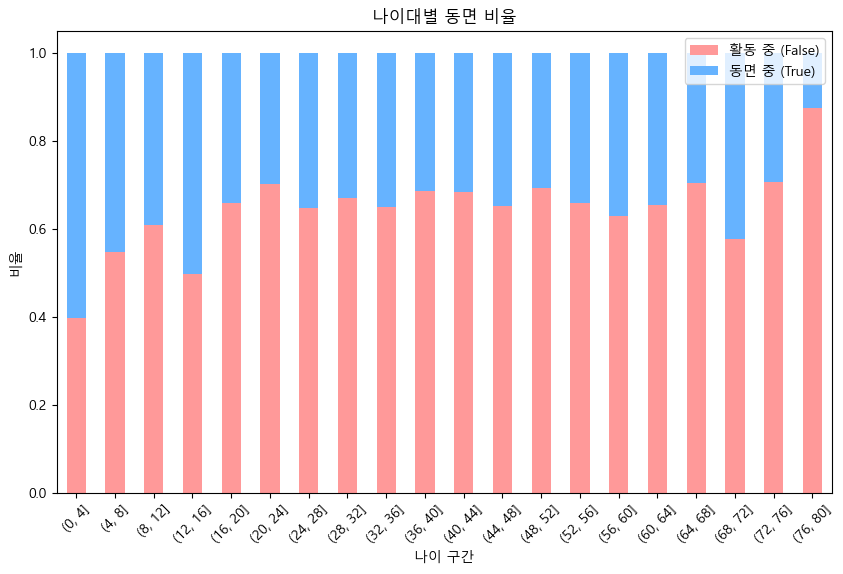

In [26]:
# 나이 구간별 동면 여부 데이터 집계 (비율로 계산)
age_cryo_dist = train_df.groupby('AgeGroup', observed=False)['CryoSleep'].value_counts(normalize=True).unstack()

# 시각화
age_cryo_dist.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

plt.title('나이대별 동면 비율')
plt.xlabel('나이 구간')
plt.ylabel('비율')
plt.legend(['활동 중 (False)', '동면 중 (True)'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

이번에는 나이대별로 동면 여부별 전송 비율을 알아보겠습니다.

In [27]:
# 기본값 세팅
train_df['Age_Cryo'] = 'Adult_Active' 

# 각 연령대별 + 동면 여부
# Baby
train_df.loc[(train_df['Baby'] == 1) & (train_df['CryoSleep'] == True), 'Age_Cryo'] = 'Baby_Sleep'
train_df.loc[(train_df['Baby'] == 1) & (train_df['CryoSleep'] == False), 'Age_Cryo'] = 'Baby_Active'

# Child
train_df.loc[(train_df['Child'] == 1) & (train_df['CryoSleep'] == True), 'Age_Cryo'] = 'Child_Sleep'
train_df.loc[(train_df['Child'] == 1) & (train_df['CryoSleep'] == False), 'Age_Cryo'] = 'Child_Active'

# Teenager
train_df.loc[(train_df['Teenager'] == 1) & (train_df['CryoSleep'] == True), 'Age_Cryo'] = 'Teen_Sleep'
train_df.loc[(train_df['Teenager'] == 1) & (train_df['CryoSleep'] == False), 'Age_Cryo'] = 'Teen_Active'

# Adult
train_df.loc[(train_df['Adult'] == 1) & (train_df['CryoSleep'] == True), 'Age_Cryo'] = 'Adult_Sleep'
train_df.loc[(train_df['Adult'] == 1) & (train_df['CryoSleep'] == False), 'Age_Cryo'] = 'Adult_Active'

# MiddleAged
train_df.loc[(train_df['MiddleAged'] == 1) & (train_df['CryoSleep'] == True), 'Age_Cryo'] = 'Middle_Sleep'
train_df.loc[(train_df['MiddleAged'] == 1) & (train_df['CryoSleep'] == False), 'Age_Cryo'] = 'Middle_Active'

# Senior
train_df.loc[(train_df['Senior'] == 1) & (train_df['CryoSleep'] == True), 'Age_Cryo'] = 'Senior_Sleep'
train_df.loc[(train_df['Senior'] == 1) & (train_df['CryoSleep'] == False), 'Age_Cryo'] = 'Senior_Active'

# 결과 확인
age_cryo_ratio = train_df.groupby('Age_Cryo')['Transported'].mean().sort_values(ascending=False)
print("Age_Cryo별 전송 확률")
print(age_cryo_ratio)

Age_Cryo별 전송 확률
Age_Cryo
Senior_Sleep     0.887324
Middle_Sleep     0.836401
Adult_Sleep      0.831852
Teen_Sleep       0.823423
Baby_Sleep       0.780591
Baby_Active      0.761682
Child_Sleep      0.628571
Child_Active     0.593750
Middle_Active    0.325888
Adult_Active     0.318142
Teen_Active      0.298153
Senior_Active    0.270833
Name: Transported, dtype: float64


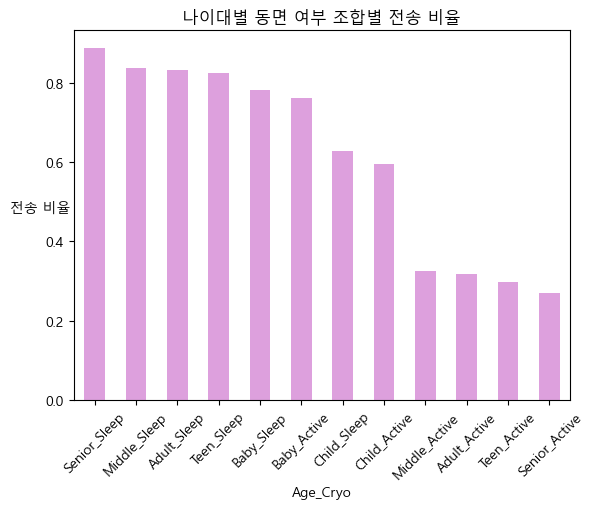

In [28]:
# 시각화
age_cryo_ratio.plot(kind='bar', color='plum', rot=45)
plt.title('나이대별 동면 여부 조합별 전송 비율')
plt.ylabel('전송 비율', rotation=0)
plt.show()

Senior그룹은 동면했을 때 88%로 전송 확률이 매우 높지만 깨어 있을 때는 27%로 낮다는 것을 알 수 있습니다.<br> Middle, Adult, Teenager그룹도 동면했을 때 83%가량으로 높고 깨어 있을 때는 30%가량으로 낮습니다.<br>반면에 0~4세 Baby그룹은 77%,76%로 동면 중이나 동면 중이지 않을 때나 거의 차이 없이 전송 확률이 매우 높다는 것을 알 수 있습니다.<br>4~12세 Child그룹 또한 62%, 59%로 동면 여부의 차이가 거의 없으며 전송 확률이 평균보다는 높다는 것을 알 수 있습니다.<br>스스로를 보호할 능력이 없는 Baby그룹과 그보다는 낮지만 마찬가지인 Child그룹을 제외하면 동면 중일 때와 그렇지 않을 때 전송 확률의 격차가 큰 것을 보아, 깨어 있는 상태였다면 대처가 어느정도는 되는 상황이었다고 추측할 수 있습니다.

## 3. 지출 금액(RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)

In [29]:
# 지출 항목 하나로 합치기
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# 총 지출액 합산
train_df['TotalSpending'] = train_df[spending_cols].sum(axis=1)

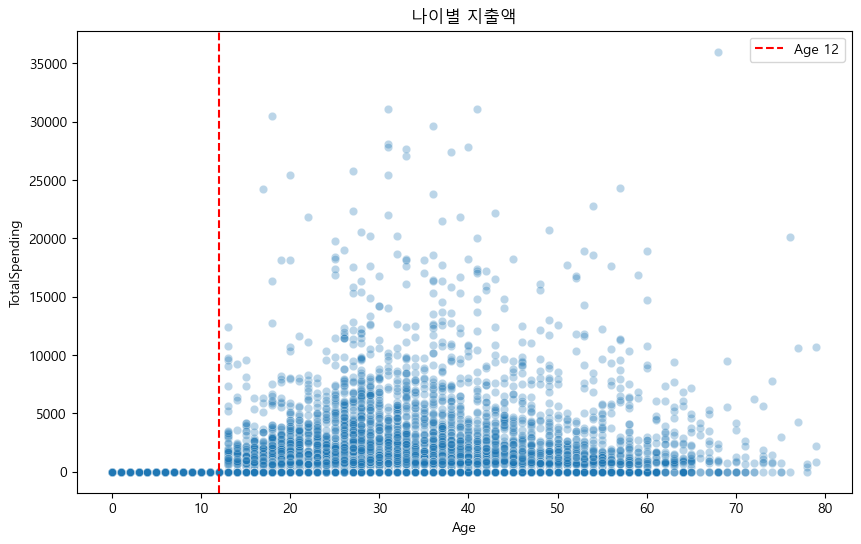

In [30]:
# 나이와 지출의 상관관계 산점도로 확인
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='TotalSpending', alpha=0.3)
plt.axvline(12, color='red', linestyle='--', label='Age 12')
plt.title('나이별 지출액')
plt.legend()
plt.show()

In [31]:
# 0세부터 20세까지, 나이별 평균 지출액 확인
age_spending = train_df.groupby('Age')['TotalSpending'].mean().head(20)
print(age_spending)

Age
0.0        0.000000
1.0        0.000000
2.0        0.000000
3.0        0.000000
4.0        0.000000
5.0        0.000000
6.0        0.000000
7.0        0.000000
8.0        0.000000
9.0        0.000000
10.0       0.000000
11.0       0.000000
12.0       0.000000
13.0    1115.304965
14.0     663.449275
15.0     772.329032
16.0     707.884354
17.0     909.911392
18.0    1092.787500
19.0     970.873720
Name: TotalSpending, dtype: float64


이번엔 지출 구간별 전송 비율을 알아보겠습니다.

In [33]:
# 구간에 붙일 이름 리스트 만들기
my_labels = ['0원 구간', '중간 지출 구간', '고액 지출 구간']

# 구간 나누기
train_df['SpendingGroup'] = pd.qcut(train_df['TotalSpending'], q=5, duplicates='drop', labels=my_labels)

# 그룹화해서 전송 비율 계산
spend_group_ratio = train_df.groupby('SpendingGroup', observed=False)['Transported'].value_counts(normalize=True).unstack()
print(spend_group_ratio)

Transported       False     True 
SpendingGroup                    
0원 구간          0.361771  0.638229
중간 지출 구간       0.717491  0.282509
고액 지출 구간       0.679126  0.320874


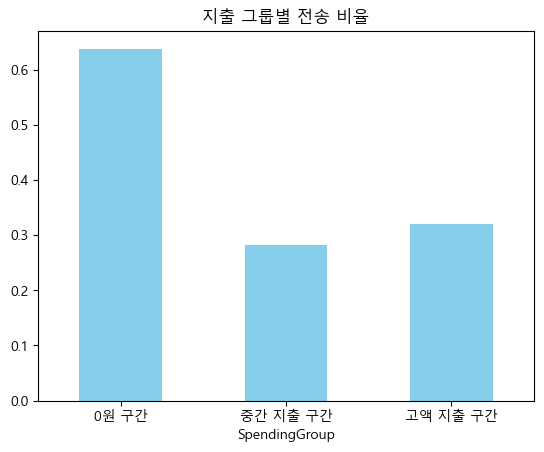

In [34]:
# 시각화
spend_group_ratio[True].plot(kind='bar', color='skyblue', rot=0)
plt.title('지출 그룹별 전송 비율')
plt.show()

한 푼도 쓰지 않은 사람이 전송될 확률이 63%로 높습니다. 돈을 쓴 그룹인 중간 지출 구간과 고액 지출 구간은 28%와 32%로 전송 확률이 낮다는 것을 알 수 있습니다.

In [ ]:
# 지출이 0원인 사람들만 추출
zero_spenders = train_df[train_df['TotalSpending'] == 0]

# 지출이 0원인 사람의 동면 여부에 따른 전송 확률 확인
zero_cryo_analysis = zero_spenders.groupby('CryoSleep', observed=False)['Transported'].mean()
print(zero_cryo_analysis)

CryoSleep
False    0.615830
True     0.817583
Name: Transported, dtype: float64


똑같이 지출이 없는 승객이라도 동면 상태(True)였던 승객의 전송률은 약 82%, 깨어 있었던(False) 승객의 전송률은 61%이었습니다.<br>20%나 차이나는 것을 보면 단순히 '돈을 쓰지 않았다'는 사실보다, 동면 상태에서는 저항이 불가능하므로 동면 상태가 생존을 결정짓는 훨씬 더 강력한 변수였음을 시사합니다.

In [36]:
zero_cryo_counts = zero_spenders['CryoSleep'].value_counts(normalize=True)

print("0원 지출자 내부의 동면 여부 비중")
print(zero_cryo_counts)

0원 지출자 내부의 동면 여부 비중
CryoSleep
True     0.85429
False    0.14571
Name: proportion, dtype: float64


지출이 0원인 승객들을 보면 약 85.4%가 동면 상태인 것을 알 수 있습니다. 이는 '지출 0원'이라는 특징이 사실상 '동면 중'임을 나타내는 강력한 지표임을 의미합니다. 앞서 분석한 대로 동면 중인 승객의 실종률이 압도적으로 높았기 때문에, 모델은 지출 데이터를 통해 승객의 동면 여부를 간접적으로 파악할 수 있을 것으로 예상됩니다.

## 4. 고향 행성 (HomePlanet)

In [ ]:
# 행성별 인원수 확인
print(train_df['HomePlanet'].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


Transported     False     True 
HomePlanet                     
Earth        0.576054  0.423946
Europa       0.341154  0.658846
Mars         0.476976  0.523024


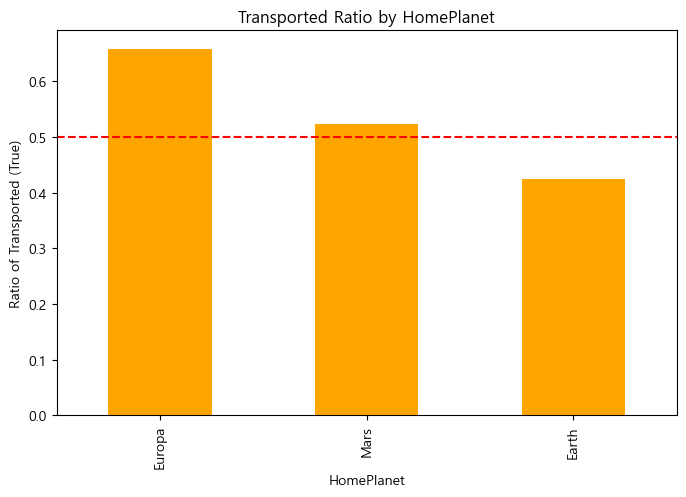

In [38]:
# 행성별 전송 비율
planet_ratio = train_df.groupby('HomePlanet')['Transported'].value_counts(normalize=True).unstack()
print(planet_ratio)

# 시각화
planet_ratio[True].sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), color='orange')
plt.axhline(0.5, color='red', linestyle='--')
plt.title('Transported Ratio by HomePlanet')
plt.ylabel('Ratio of Transported (True)')
plt.show()

에우로파 행성 출신자가 65%로 전송 확률이 높은 것을 알 수 있습니다.

이번에는 행성별 지출액과 VIP 인원수를 보겠습니다.

In [39]:
# 행성별 평균 지출액 비교
planet_spending = train_df.groupby('HomePlanet')['TotalSpending'].mean().sort_values(ascending=False)
print("행성별 평균 지출:\n", planet_spending)

# 행성별 VIP 인원수 확인
planet_vip = train_df.groupby('HomePlanet')['VIP'].sum()
print("\n행성별 VIP 인원:\n", planet_vip)

행성별 평균 지출:
 HomePlanet
Europa    3451.624589
Mars      1051.256964
Earth      673.337462
Name: TotalSpending, dtype: float64

행성별 VIP 인원:
 HomePlanet
Earth       0
Europa    131
Mars       63
Name: VIP, dtype: object


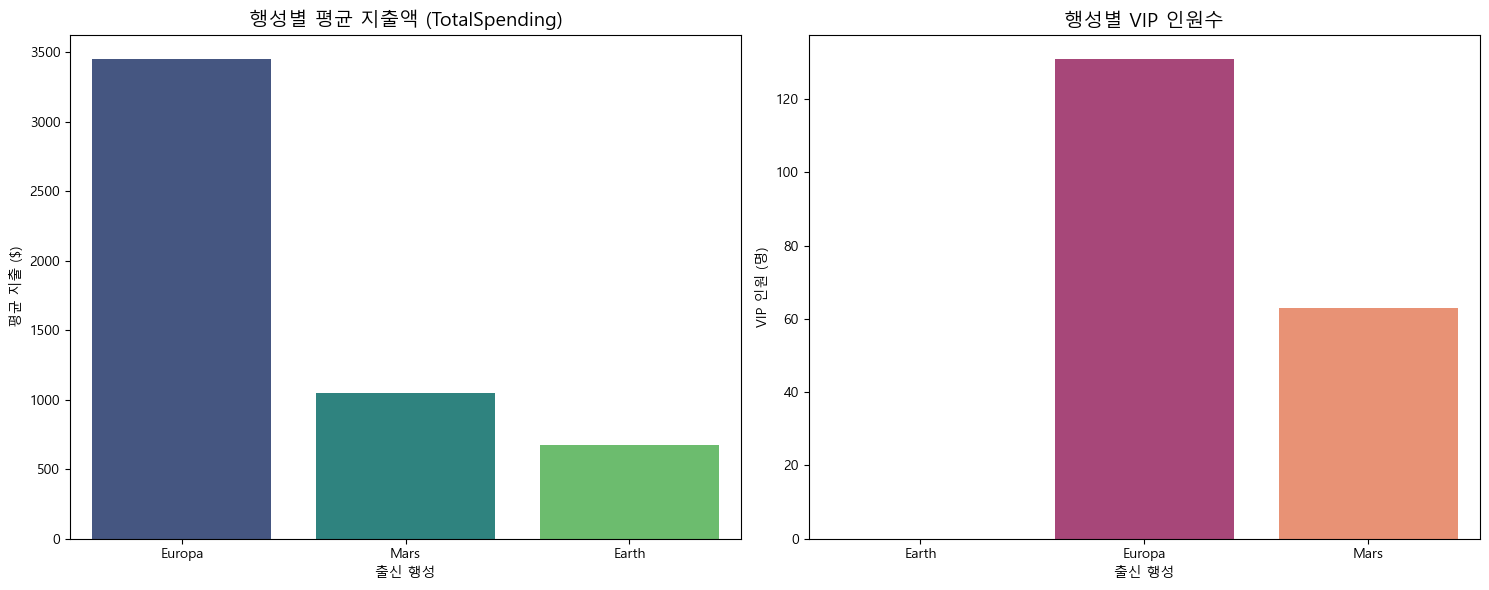

In [40]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 행성별 평균 지출액 막대 그래프
sns.barplot(x=planet_spending.index, y=planet_spending.values, ax=axes[0], palette='viridis', hue=planet_spending.index, legend=False)
axes[0].set_title('행성별 평균 지출액 (TotalSpending)', fontsize=14)
axes[0].set_ylabel('평균 지출 ($)')
axes[0].set_xlabel('출신 행성')

# 행성별 VIP 인원수 막대 그래프
sns.barplot(x=planet_vip.index, y=planet_vip.values, ax=axes[1], palette='magma', hue=planet_spending.index, legend=False)
axes[1].set_title('행성별 VIP 인원수', fontsize=14)
axes[1].set_ylabel('VIP 인원 (명)')
axes[1].set_xlabel('출신 행성')

plt.tight_layout()
plt.show()

행성별 평균 지출액을 보면 에우로파 행성의 지출액이 다른 행성보다 월등히 높습니다.<br>행성별 VIP인원 또한 에우로파 행성이 131명으로 가장 많고, 화성은 63명, 지구는 한 명도 없습니다. 이를 통해 에우로파 행성은 다른 행성보다 부유한 행성임을 알 수 있고, 지구는 가장 가난한 행성임을 알 수 있습니다.

이번에는 행성별 동면 비율을 확인해 보겠습니다.

In [41]:
# 행성별 동면 비율 확인
cryo_by_planet = train_df.groupby('HomePlanet')['CryoSleep'].mean()
print("행성별 동면 비율:\n", cryo_by_planet)

# 유로파 주민의 동면 여부별 전송률 확인
europa_only = train_df[train_df['HomePlanet'] == 'Europa']
europa_cyro = europa_only.groupby('CryoSleep')['Transported'].mean()
print("\n유로파 내부 동면 여부별 전송률:\n", europa_cyro)

# 지구 주민의 동면 여부별 전송률 확인
earth_only = train_df[train_df['HomePlanet'] == 'Earth']
earth_cyro = earth_only.groupby('CryoSleep')['Transported'].mean()
print("\n지구 내부 동면 여부별 전송률:\n", earth_cyro)

# 화성 주민의 동면 여부별 따른 전송률 확인
mars_only = train_df[train_df['HomePlanet'] == 'Mars']
mars_cyro = mars_only.groupby('CryoSleep')['Transported'].mean()
print("\n화성 내부 동면 여부별 전송률:\n", mars_cyro)

행성별 동면 비율:
 HomePlanet
Earth     0.307932
Europa     0.43946
Mars       0.38986
Name: CryoSleep, dtype: object

유로파 내부 동면 여부별 전송률:
 CryoSleep
False    0.400172
True     0.989023
Name: Transported, dtype: float64

지구 내부 동면 여부별 전송률:
 CryoSleep
False    0.320992
True     0.656295
Name: Transported, dtype: float64

화성 내부 동면 여부별 전송률:
 CryoSleep
False    0.276982
True     0.911809
Name: Transported, dtype: float64


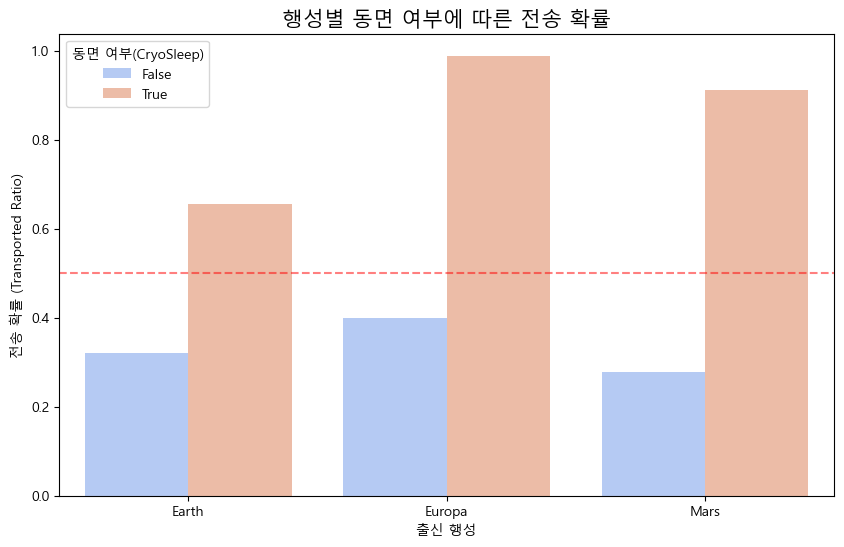

In [42]:
# 행성별 + 동면여부별 전송률 평균 계산
planet_cryo_ratio = train_df.groupby(['HomePlanet', 'CryoSleep'])['Transported'].mean().reset_index()

# 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=planet_cryo_ratio, x='HomePlanet', y='Transported', hue='CryoSleep', palette='coolwarm')

# 기준선 추가 - 전송 확률 50% 지점
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5)

plt.title('행성별 동면 여부에 따른 전송 확률', fontsize=15)
plt.ylabel('전송 확률 (Transported Ratio)')
plt.xlabel('출신 행성')
plt.legend(title='동면 여부(CryoSleep)', loc='upper left')

plt.show()

행성별 동면 비율은 에우로파가 제일 높았습니다. 동면에는 돈이 들 것이므로 앞서 항성별 지출액으로 봤을 때, 가장 부유했던 에우로파>화성>지구 순으로 동면 비율이 높은 것을 알 수 있습니다.

행성별 동면 여부에 따른 전송률을 보면 에우로파(Europa)의 동면자 전송률은 무려 99%에 육박하며, 화성(Mars) 역시 91%로 매우 높게 나타났습니다. 반면 지구(Earth) 출신 동면자의 전송률은 65%로, 타 행성에 비해 확연히 낮은 수치를 보입니다.

돈이 많은 행성일수록 전송률이 높고, 돈이 많은 행성의 동면자는 전송률이 대폭 상승하므로 돈이 많은 행성의 객실과 그렇지 않은 행성의 객실의 위치에 따른 차이라고 추측해볼 수 있을 것 같습니다. 따라서 다음에는 승객들이 머물렀던 구체적인 객실 위치를 알 수 있는 Cabin을 살펴보겠습니다.

## 5. Cabin(객실)

In [43]:
# Cabin 컬럼을 층(Deck), 번호(Num), 방향(Side)으로 분리
# P는 Port(좌현), S는 Starboard(우현)를 의미합니다.
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
print(train_df['Deck'].value_counts())

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64


In [44]:
print(train_df['Side'].value_counts())

Side
S    4288
P    4206
Name: count, dtype: int64


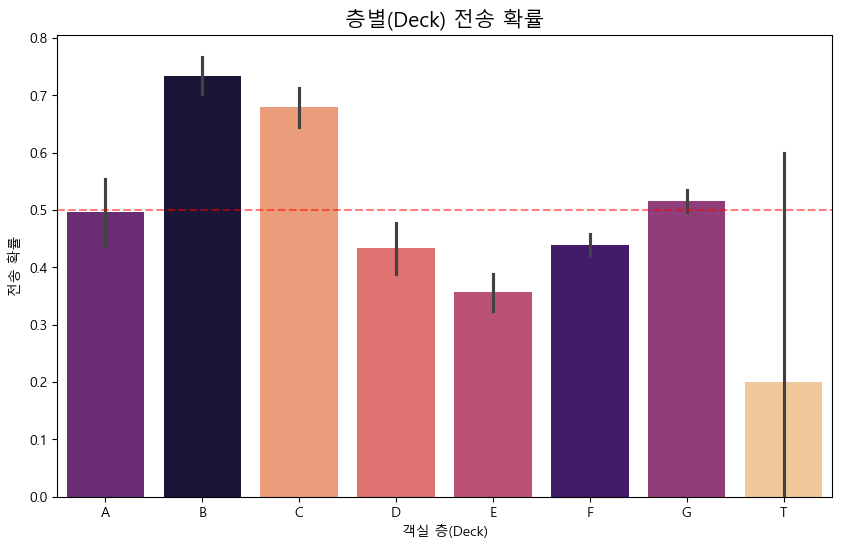

In [45]:
# 그래프로 시각화
plt.figure(figsize=(10, 6))

# Deck별 전송률 그래프로 그리기
deck_order = sorted(train_df['Deck'].dropna().unique())
sns.barplot(data=train_df, x='Deck', y='Transported', order=deck_order, palette='magma', hue='Deck', legend=False)
plt.title('층별(Deck) 전송 확률', fontsize=15)
plt.ylabel('전송 확률')
plt.xlabel('객실 층(Deck)')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5)

plt.show()

B층과 C층 승객들의 전송 확률이 약 70% 내외로 다른 층에 비해 압도적으로 높게 나타났습니다. T층은 전송 확률이 매우 낮습니다. 그래프 상단의 검은색 막대(Error Bar)를 보면 T층의 변동 폭이 매우 큰 것을 볼 수 있는데, 이는 해당 층의 승객 표본 수가 적기 때문입니다. 반면 승객이 밀집된 B, C, F, G층은 오차 범위가 좁아, 해당 구역의 전송 확률 수치가 신뢰할 만한 데이터임을 확인할 수 있습니다.

앞서 본 Deck(층) 분석과 이 Side(방향) 분석을 종합해 보면, 우주선의 특정 층(B, C 데크)과 특정 방향(S)이 교차하는 지점이 가장 위험한 구역이었음을 알 수 있습니다. 이처럼 세분화된 공간 정보는 모델이 '어떤 승객이 실종될 것인가'를 예측하는 데 도움이 될 것입니다.

--- 좌우(P/S) 방향별 전송 확률 ---
Side
P    0.451260
S    0.555037
Name: Transported, dtype: float64


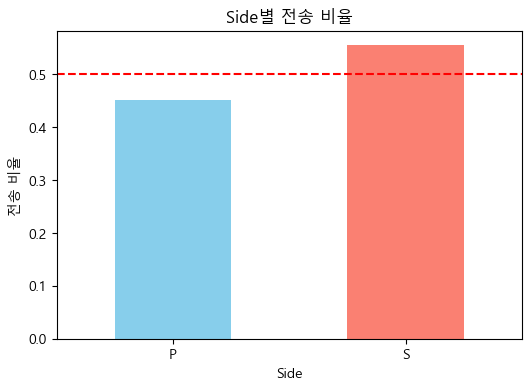

In [46]:
# Side별 전송 확률 계산
side_analysis = train_df.groupby('Side')['Transported'].mean()
print("--- 좌우(P/S) 방향별 전송 확률 ---")
print(side_analysis)

# 시각화로 한눈에 비교
side_analysis.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6, 4), rot=0)
plt.title('Side별 전송 비율')
plt.ylabel('전송 비율')
plt.axhline(0.5, color='red', linestyle='--')
plt.show()

우주선의 좌현(Port, P)과 우현(Starboard, S)에 따른 실종 비율을 보면 우측(S)에 머물렀던 승객들의 전송 비율이 약 55%로 좌측(P)보다 더 높게 나타났습니다. 이는 사고 당시 에너지 충격이나 차원 균열같은 이상현상이 우주선의 특정 방향(S)에 더 강하게 작용했음을 추측할 수 있습니다.

이번에는 행성별로 어떤 층수(Deck)에 머물렀는지 살펴보겠습니다.

In [47]:
# Deck 정보 추출
if 'Deck' not in train_df.columns:
    train_df['Deck'] = train_df['Cabin'].str.split('/', expand=True)[0]

# 행성별 Deck 거주 현황
planet_deck = pd.crosstab(train_df['HomePlanet'], train_df['Deck'], normalize='index')
print(planet_deck)

Deck               A         B         C         D         E         F  \
HomePlanet                                                               
Earth       0.000000  0.000000  0.000000  0.000000  0.087641  0.358110   
Europa      0.121739  0.370048  0.354589  0.089855  0.061836  0.000000   
Mars        0.000000  0.000000  0.000000  0.163763  0.191638  0.644599   

Deck               G         T  
HomePlanet                      
Earth       0.554249  0.000000  
Europa      0.000000  0.001932  
Mars        0.000000  0.000000  


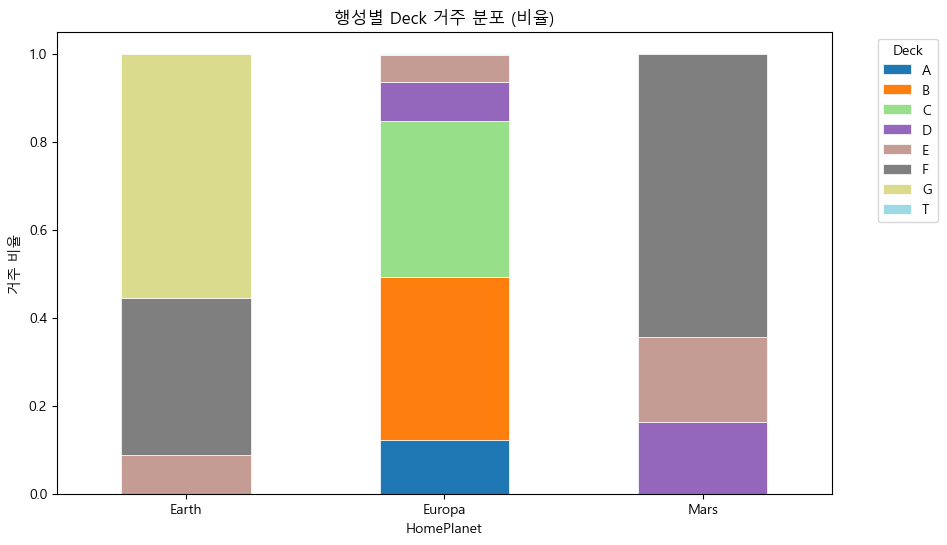

In [48]:
# 그래프로 시각화
# planet_deck.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', rot=0)
planet_deck.plot(kind='bar', stacked=True, figsize=(10, 6), 
                 colormap='tab20', edgecolor='white', linewidth=0.5, rot=0)
plt.title('행성별 Deck 거주 분포 (비율)')
plt.ylabel('거주 비율')
plt.legend(title='Deck', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

가장 많은 인원이 탑승한 지구(Earth) 출신 승객들은 주로 우주선의 저층부로 추정되는 G층(55.4%)과 F층(35.8%)에 집중되어 있습니다. 앞서 확인한 이들의 낮은 전송률은, 사고 당시 저층부가 상대적으로 영향이 적었거나 대피 시스템이 달랐을 가능성을 추측할 수 있습니다.<br>에우로파(Europa) 승객들은 B층(37%)과 C층(35.4%)이라는 특정 구역에 매우 집약적으로 분포합니다. 특히 주목할 점은 T층인데, 오직 에우로파 출신 승객 5명만이 거주하고 있었습니다.<br>화성(Mars) 승객들의 주 거주지는 F층(64.5%)이며, 나머지는 E층과 D층에 분산되어 있습니다. 지구와 마찬가지로 F층을 공유하고 있지만, 화성 승객들은 지구 승객보다 동면 비율이 더 높았기 때문에 같은 층에 머물렀음에도 전송률에서 차이가 발생했음을 알 수 있습니다.

전송 확률이 확연히 낮은 T층을 살펴보겠습니다.

In [49]:
# Deck T 승객 5명만 필터링
deck_t_investigation = train_df[train_df['Deck'] == 'T'].copy()

# 실종 여부(Transported) 다시 합치기 (분석용)
# 만약 all_data에 Transported가 없다면 원본 train 데이터에서 가져옵니다.
if 'Transported' not in deck_t_investigation.columns:
    train_original = pd.read_csv('train.csv')
    deck_t_investigation = deck_t_investigation.merge(
        train_original[['PassengerId', 'Transported']], 
        on='PassengerId', 
        how='left'
    )

# 주요 지출 항목과 실종 여부 출력
cols_to_show = ['PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
print("Deck T 거주자 5인")
display(deck_t_investigation[cols_to_show])

# 수치로 요약 확인
print("\nT층 실종자 수")
print(deck_t_investigation['Transported'].value_counts())

Deck T 거주자 5인


,PassengerId,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
1004,1071_01,415.0,1328.0,0.0,14.0,60.0,False
2254,2414_01,0.0,1829.0,2.0,3133.0,2447.0,False
2734,2935_01,0.0,28.0,0.0,6841.0,543.0,False
2763,2971_01,0.0,3135.0,0.0,26.0,3.0,True
4565,4863_01,1721.0,667.0,NaN,28.0,1362.0,False



T층 실종자 수
Transported
False    4
True     1
Name: count, dtype: int64


전체 승객 중 T층에 거주하는 승객은 단 5명뿐인 것으로 확인되었습니다. 이들은 앞선 분석에서 언급했듯이 전원 에우로파(Europa) 출신이며, 보시는 것처럼 지출액(RoomService, FoodCourt 등)이 다른 승객들에 비해 압도적으로 높음을 수치를 통해 확인할 수 있습니다.<br>특이한 점은 T층의 실종자 수입니다. 총 5명 중 4명이 전송되지 않았고(False), 단 1명만이 전송(True)되었습니다. 이는 대다수 승객의 전송률이 높았던 B, C 데크와는 상반된 결과입니다. 이를 통해 비슷한 상층부라도 T층은 물리적으로 가장 격리된 구역이었거나, 사고 당시 가장 안전했던 특별 구역이었을 가능성이 있습니다.

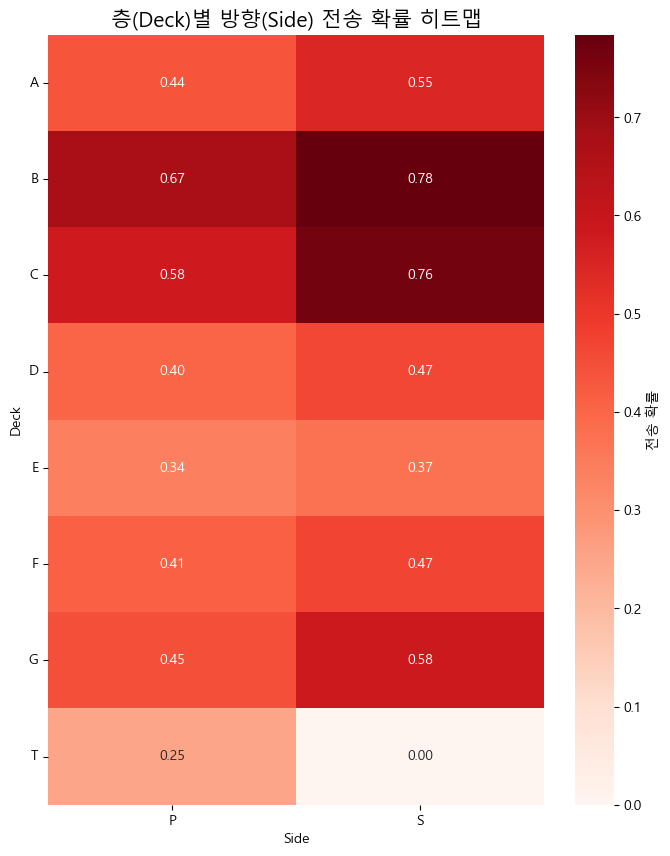

In [50]:
# Deck과 Side별 전송 확률 교차표 만들기
deck_side_pivot = train_df.pivot_table(index='Deck', columns='Side', values='Transported', aggfunc='mean')

# 히트맵으로 시각화
plt.figure(figsize=(8, 10))
sns.heatmap(deck_side_pivot, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': '전송 확률'})
plt.title('층(Deck)별 방향(Side) 전송 확률 히트맵', fontsize=15)
plt.yticks(rotation=0)
plt.show()

층(deck)별 방향(side)에 따른 전송 확률 히트맵을 보면 앞서 본 Deck(층) 분석과 이 Side(방향) 분석을 종합해 봤을 때, 우주선의 특정 층인 B, C 층과 특정 방향인 우측(S)이 교차하는 지점이 가장 위험한 구역이었음을 알 수 있습니다. 이처럼 세분화된 공간 정보는 모델이 '어떤 승객이 실종될 것인가'를 예측하는 데 도움이 될 것입니다.

## 6. VIP

In [51]:
print(train_df['VIP'].value_counts(dropna=False))

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64


In [52]:
# VIP별 전송 확률
print("VIP 여부별 전송 확률")
print(train_df.groupby('VIP')['Transported'].mean())

# VIP와 행성의 관계
print("\nVIP들의 고향 행성")
print(pd.crosstab(train_df['HomePlanet'], train_df['VIP']))

VIP 여부별 전송 확률
VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

VIP들의 고향 행성
VIP         False  True 
HomePlanet              
Earth        4487      0
Europa       1958    131
Mars         1653     63


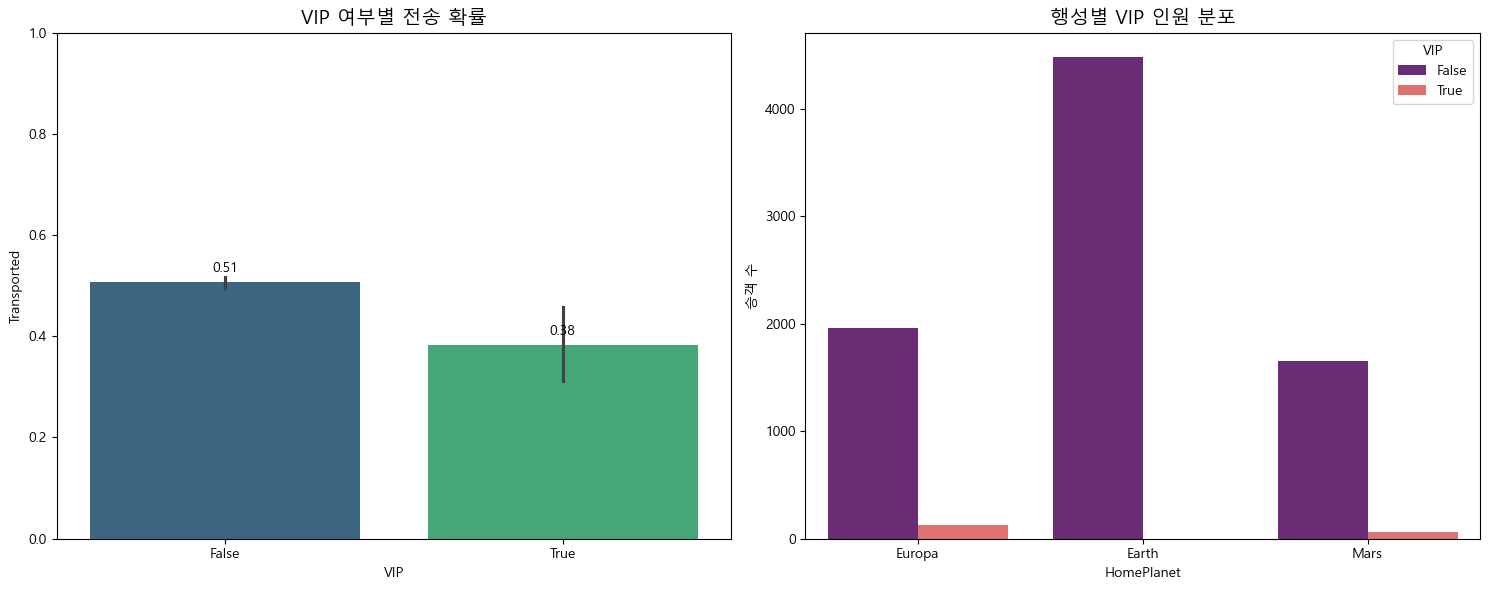

In [53]:
# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# VIP 여부에 따른 전송 확률
sns.barplot(data=train_df, x='VIP', y='Transported', ax=axes[0], palette='viridis', hue='VIP', legend=False)
axes[0].set_title('VIP 여부별 전송 확률', fontsize=14)
axes[0].set_ylim(0, 1)

# 확률 수치 표시
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 행성별 VIP 분포
# VIP가 True/False인 인원수를 행성별로 시각화
sns.countplot(data=train_df, x='HomePlanet', hue='VIP', ax=axes[1], palette='magma')
axes[1].set_title('행성별 VIP 인원 분포', fontsize=14)
axes[1].set_ylabel('승객 수')

plt.tight_layout()
plt.show()

VIP의 전송 확률이 False 50.6%, True 38%이므로 VIP는 38%로 일반 승객에 비해 전송될 확률이 낮다는 것을 알 수 있습니다.<br> 위에서 B, C층(에우로파의 주거주지)의 전송 확률이 70~80%였는데도 에우로파 행성의 비율이 높은 VIP 승객의 전송 확률이 낮습니다.<br> 그러므로 VIP 구역은 같은 층이라도 조금 더 안전한 위치에 있었다, 혹은 VIP들은 사고 당시 구명정이나 안전 구역으로 빠르게 대피할 수 있는 권한이 있었다.등의 가설을 세울 수 있습니다.

In [54]:
# VIP 승객들만 골라내서 어느 Deck에 살았는지 확인하기
vip_deck_dist = pd.crosstab(train_df['Deck'], train_df['VIP'])
print("Deck별 VIP 거주 현황")
print(vip_deck_dist)

Deck별 VIP 거주 현황
VIP   False  True 
Deck              
A       215     35
B       725     42
C       687     41
D       438     31
E       846     15
F      2695     29
G      2493      0
T         5      0


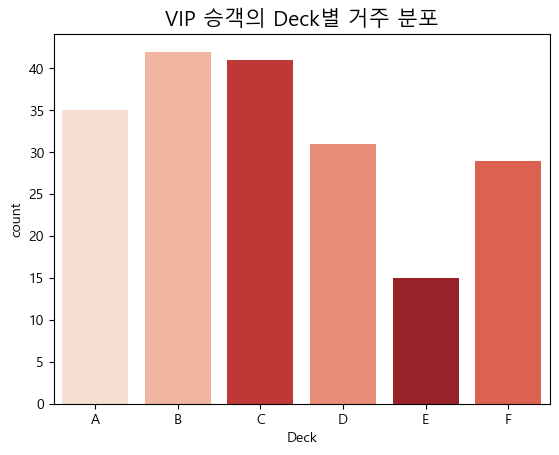

In [55]:
# VIP가 True인 데이터만 필터링
vip_only = train_df[train_df['VIP'] == True]

sns.countplot(
    data=vip_only, 
    x='Deck', 
    order=sorted(vip_only['Deck'].dropna().unique()), 
    palette='Reds',
    hue='Deck',     
    legend=False   
)

plt.title('VIP 승객의 Deck별 거주 분포', fontsize=15)
plt.show()

데이터를 분석해 보면 전체 약 8,700명의 승객 중 공식 VIP는 194명에 불과하며, 그마저도 G층과 T층에는 단 한 명의 VIP도 존재하지 않습니다<br>가장 중요한 것은 B층과 C층입니다. 이 구역은 VIP 인원수도 가장 많지만(각각 42명, 41명), 동시에 일반 승객도 가장 많이 거주하는 구역 중 하나입니다.<br>지표상 VIP의 실종 확률(38%)이 일반인(51%)보다 낮은 이유는, VIP 인원이 가장 많은 B, C층 외에도 비교적 안전했던 A, D, E, F층에 VIP들이 넓게 분산되어 있었기 때문으로 볼 수 있습니다. G층에는 VIP가 0명이라는 점이 VIP 그룹 전체의 실종 확률을 낮췄음을 알 수 있습니다.

## 7. 목적지 행성(Destination)

In [56]:
# 고향 행성별 목적지 행성
print("고향 행성별 목적지 분포")
print(pd.crosstab(train_df['HomePlanet'], train_df['Destination']))

고향 행성별 목적지 분포
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth                690            712         3101
Europa               886             19         1189
Mars                 193             49         1475


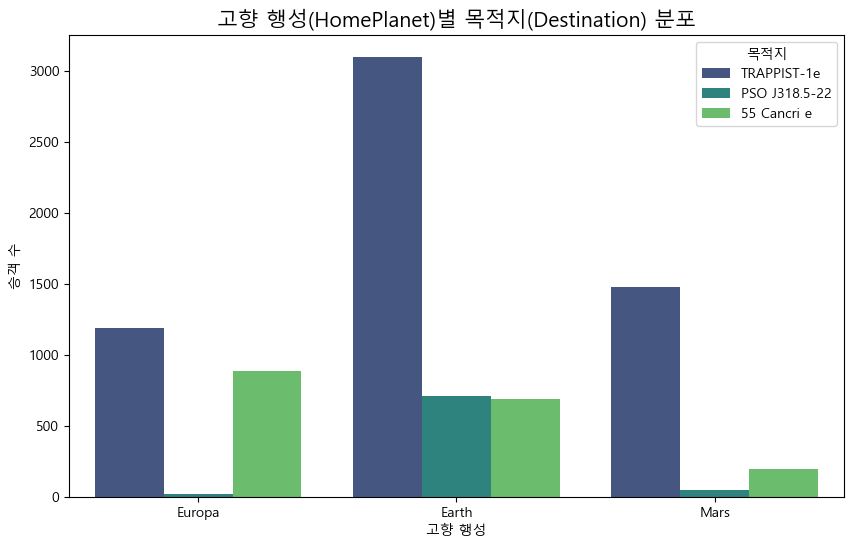

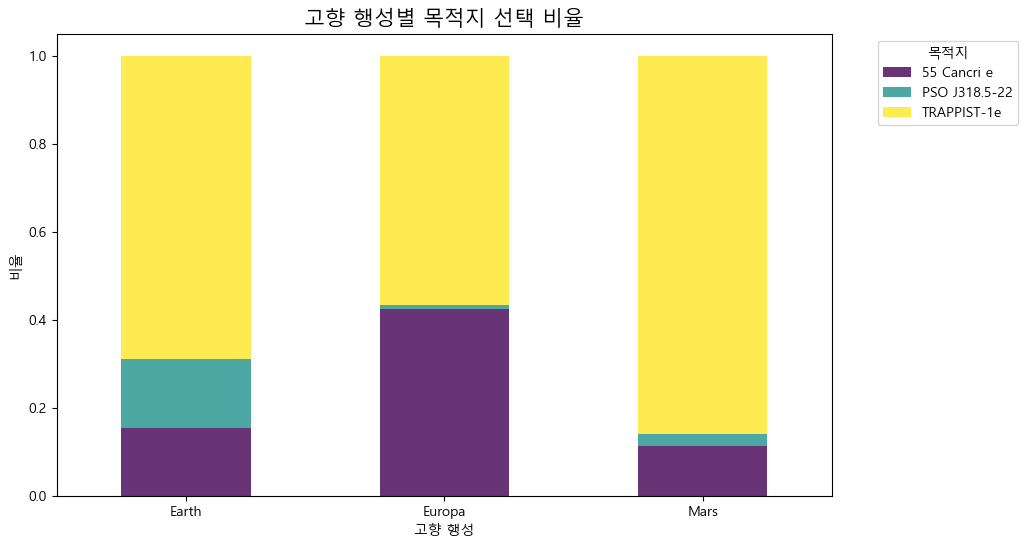

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='HomePlanet', hue='Destination', palette='viridis')

plt.title('고향 행성(HomePlanet)별 목적지(Destination) 분포', fontsize=15)
plt.xlabel('고향 행성')
plt.ylabel('승객 수')
plt.legend(title='목적지', loc='upper right')

plt.show()

# 비율로 확인하기 (어떤 행성 사람들이 특정 목적지를 더 선호하는가?)
planet_dest_pct = pd.crosstab(train_df['HomePlanet'], train_df['Destination'], normalize='index')
planet_dest_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.8)

plt.title('고향 행성별 목적지 선택 비율', fontsize=15)
plt.xlabel('고향 행성')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.legend(title='목적지', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

수치상으로 지구(3,101명), 화성(1,475명), 에우로파(1,189명) 순으로 압도적인 인원이 TRAPPIST-1e를 목적지로 선택했습니다<br>다른 행성들이 TRAPPIST-1e에 매우 편중된 것과 달리, 에우로파 승객들은 55 Cancri e(886명)를 선택한 비율이 약 43%로 매우 높습니다. 즉, "에우로파 출신의 부유한 승객들이 55 Cancri e라는 특정 목적지로 향하는 고급 항로를 선택했다"는 가설을 세울 수 있으며, 이 경로의 전송(실종) 특성이 다른 그룹과 차별화되었을 것입니다. PSO J318.5-22로 향하는 승객은 대부분 지구(712명) 출신입니다. 화성(49명)이나 에우로파(19명)는 이 목적지를 거의 선택하지 않았습니다. 목적지에 따른 실종 확률이 다르다면, 특정 행성 출신이 전송 확률이 높은 특정 목적지를 선택했는지가 모델의 중요한 판단 근거가 될 것입니다.

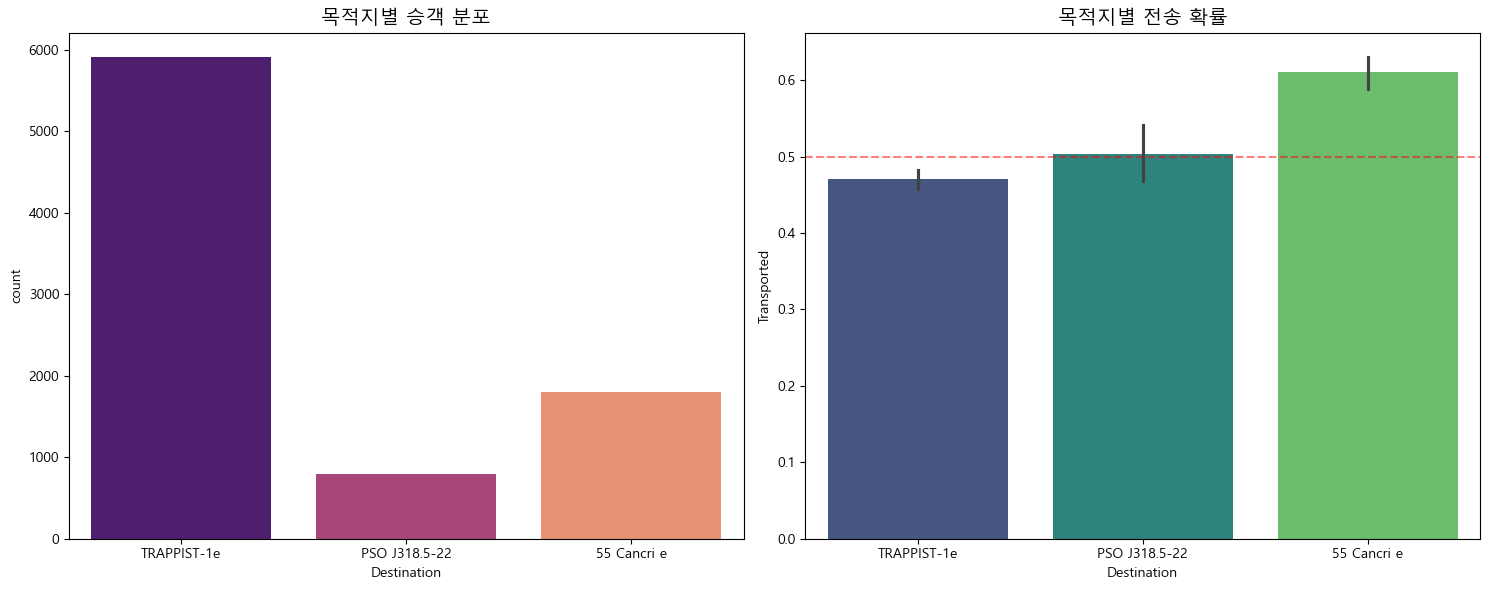

In [58]:
# 그래프 영역 설정
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# 목적지별 승객 수
sns.countplot(data=train_df, x='Destination', ax=axes[0], palette='magma', hue='Destination', legend=False)
axes[0].set_title('목적지별 승객 분포', fontsize=14)

# 목적지별 전송 확률 (어디로 가는 사람이 위험했나?)
sns.barplot(data=train_df, x='Destination', y='Transported', ax=axes[1], palette='viridis', hue='Destination', legend=False)
axes[1].set_title('목적지별 전송 확률', fontsize=14)
axes[1].axhline(0.5, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


오른쪽 '목적지별 전송 확률' 그래프를 보면, 어디로 가느냐가 생사에 큰 영향을 미쳤으며, 55 Cancri e로 향하던 승객들의 실종 확률이 60%를 상회하며 세 목적지 중 압도적으로 높습니다.<br>에우로파 주민들은 주로 B, C층에 거주하고 B, C층은 전송 확률(76~78%)이 가장 높은 '사고 직격탄' 구역입니다. 에우로파 주민들은 다른 행성 주민들보다 55 Cancri e행 티켓을 훨씬 많이 끊었기 때문에 "55 Cancri e로 가려던 에우로파 부유층 승객들이 하필 사고의 직격탄을 맞은 B, C층에 몰려 있었기 때문에 실종률이 높았다"라고 추정할 수 있습니다.<br>왼쪽 '목적지별 승객 분포'를 보면 TRAPPIST-1e는 약 6,000명에 육박하는 가장 많은 승객이 선택한 주 항로입니다. 표본이 압도적으로 많음에도 불구하고 실종 확률은 약 47%로 전체 평균(50%)에 근접합니다.<br>PSO J318.5-22는 승객 수는 가장 적지만, 전송 확률은 약 50%로 평균적인 위험도를 보입니다.

## 8. 그룹 크기(Group Size)

In [59]:
# PassengerId에서 Group ID(앞 4자리) 추출
train_df['Group'] = train_df['PassengerId'].str.split('_').str[0]

# 그룹별 인원수 계산하여 GroupSize 컬럼 생성
group_sizes = train_df.groupby('Group').size()
train_df['GroupSize'] = train_df['Group'].map(group_sizes)

# 그룹 크기별 전송 확률 수치 확인
print("그룹 크기별 전송 확률 현황")
print(train_df.groupby('GroupSize')['Transported'].mean())

그룹 크기별 전송 확률 현황
GroupSize
1    0.452445
2    0.538050
3    0.593137
4    0.640777
5    0.592453
6    0.614943
7    0.541126
8    0.394231
Name: Transported, dtype: float64


PassengerId를 활용해 승객들 사이의 사회적 관계인 그룹을 정의하고, 그룹별 인원수를 계산해서 GroupSize feature를 만들어 그 관계가 전송 확률에 미치는 영향이 있는지 보겠습니다.

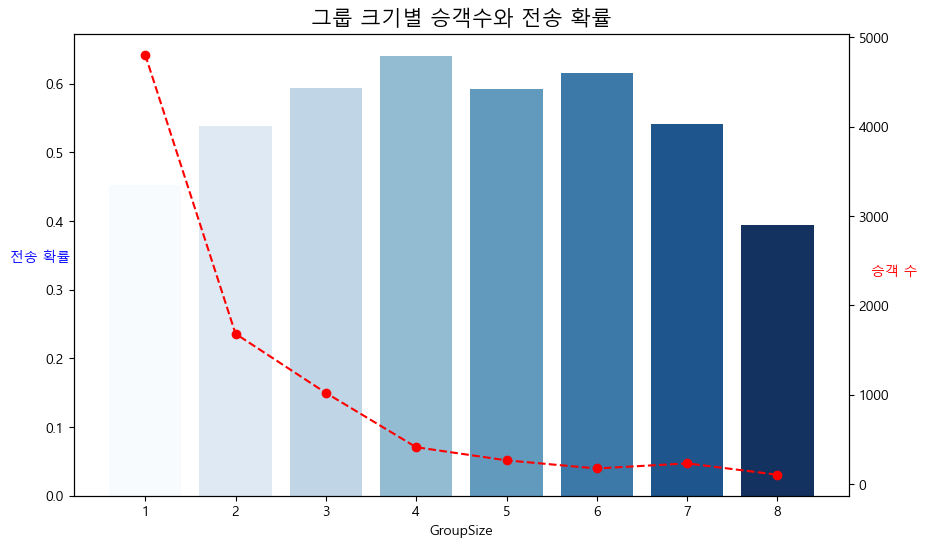

In [60]:
# 그래프로 시각화 - 그룹 크기별 승객수(Count)와 전송 확률(Ratio)을 동시에 확인
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프로 전송 확률 표시
sns.barplot(data=train_df, x='GroupSize', y='Transported', ax=ax1, 
            hue='GroupSize', palette='Blues', errorbar=None, legend=False)
ax1.set_ylabel('전송 확률', color='b', rotation=0)
ax1.set_title('그룹 크기별 승객수와 전송 확률', fontsize=15)

# 꺾은선 그래프로 해당 그룹 크기의 실제 승객 수 표시 (보조축 사용)
ax2 = ax1.twinx()
group_counts = train_df['GroupSize'].value_counts().sort_index()
ax2.plot(group_counts.index.astype(str), group_counts.values, color='red', marker='o', linestyle='--')
ax2.set_ylabel('승객 수', color='r', rotation=0)

plt.show()

혼자 온 승객(가장 많은 집단)은 전송 확률이 절반 미만입니다. 하지만 일행이 생기는 순간(2인 이상) 전송될 확률이 상승합니다.<br>4명 일행일 때 확률이 가장 높은데, 이는 객실 구조나 구역별 인원 배치와 관련이 있을 가능성이 크다고 추측할 수 있습니다.<br>가장 오른쪽 8명 그룹을 보면 확률이 39%로 뚝 떨어집니다. "8명이면 비교적 안전하다", "그룹 인원수가 많을 수록 전송될 확률이 낮다"라고 추측해볼 수 있지만, 빨간 점을 보면 표본 수가 적기 때문에 표본이 적어 생기는 특이값일 확률도 배제할 수 없을 것 같습니다.

## 9. 성씨(Surname) 분석 및 가족 규모(FamilySize)

In [61]:
# Name 컬럼에서 성(Surname) 추출 (이름이 없는 경우 'Unknown'으로 처리)
train_df['Surname'] = train_df['Name'].str.split().str[-1]

# 성씨별 인원수(FamilySize) 계산
family_counts = train_df['Surname'].value_counts()
train_df['FamilySize'] = train_df['Surname'].map(family_counts)

# 이름이 결측치인 경우 FamilySize를 1(최소단위)로 보정
train_df.loc[train_df['Surname'].isna(), 'FamilySize'] = 1

# 수치 확인
print("성씨별 가족 규모(FamilySize)별 전송 확률")
print(train_df.groupby('FamilySize')['Transported'].mean())

성씨별 가족 규모(FamilySize)별 전송 확률
FamilySize
1.0     0.556701
2.0     0.493750
3.0     0.534364
4.0     0.503906
5.0     0.509375
6.0     0.499037
7.0     0.481393
8.0     0.454044
9.0     0.482540
10.0    0.510000
11.0    0.505455
12.0    0.428571
13.0    0.461538
14.0    0.482143
15.0    0.600000
16.0    0.375000
18.0    0.388889
Name: Transported, dtype: float64


승객의 성씨(Surname)를 추출하여 우주선 내의 잠재적 가족 규모를 파악한 결과, 가족 구성원이 2~4명인 소규모 가족 집단의 전송 확률이 52%~54%로 가장 높게 나타났습니다. 반면, 성씨가 같은 사람이 10명 이상인 대규모 가문의 경우 전송 확률이 40%대로 떨어지는 경향을 보입니다.<br>이는 GroupSize와 비슷한 양상이라고 볼 수 있습니다. 가족 단위 승객들이 주로 같은 구역에 객실을 배정받았고, 사고 발생 시 함께 행동했음을 암시합니다. 이 두 변수가 서로 보완 작용을 하며 모델이 승객의 사회적 배경을 더 입증된 근거로 학습하게 만들었음을 추측할 수 있습니다.<br>이름 데이터의 결측치는 단순 제외하지 않고, 가족 규모의 최소 단위인 1로 보정했습니다.

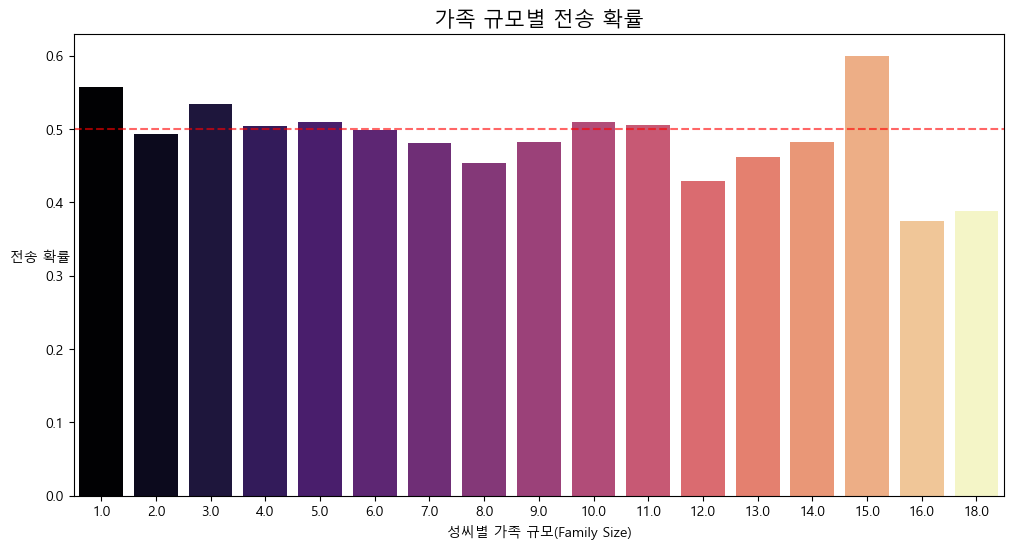

In [62]:
plt.figure(figsize=(12, 6))

# 가족 규모별 전송 확률 시각화
sns.barplot(data=train_df, x='FamilySize', y='Transported', 
            hue='FamilySize', palette='magma', legend=False, errorbar=None)

plt.axhline(0.5, color='red', linestyle='--', alpha=0.6)
plt.title('가족 규모별 전송 확률', fontsize=15)
plt.xlabel('성씨별 가족 규모(Family Size)')
plt.ylabel('전송 확률', rotation=0)
plt.show()

이 그래프는 예약 번호와 상관없이 우주선 전체에 같은 성을 가진 친척이 얼마나 있는가를 보여줍니다.<br>배에 같은 성을 가진 사람 없이 혼자인 경우(1.0) 전송 확률이 55% 이상으로 꽤 높습니다.<br>가족 규모가 커질수록(2명~14명) 전송 확률이 조금씩 낮아지거나 50% 근처에서 머무는 경향을 보입니다.<br>15명 가족에서 확률이 60%로 급격히 치솟는데, 이는 해당 인원을 가진 특정 가문이 사고 당시 전송 장치와 매우 가까운 구역(예: 특정 Deck)에 밀집해 있었던 우연한 사례일 가능성이 큽니다.<br>배에 16, 18명 있는 거대 가문은 전송 확률이 40% 아래로 매우 낮습니다. 앞서 그룹 크기별 승객 수와 전송 확률 그래프에서 8명일 때 전송 확률이 낮아진 것과 비슷하게 "너무 큰 가족 집단은 전송될 확률이 낮다"는 결론을 추측할 수 있습니다.

<a id="feature_section"></a>
# **특성 엔지니어링**

In [63]:
# 수정 전
all_data['AgeGroup'] = pd.cut(all_data['Age'], bins=range(0, 81, 4))

0~4세는 특히 전송률이 높으므로, 연령을 4세 단위로 세분화하였습니다.

In [64]:
# 수정 후
# all_data['AgeGroup'] = pd.cut(all_data['Age'], bins=range(0, 81, 4), labels=False)

케글 점수를 높이기 위해,labels=False를 추가해 숫자로 변환하였습니다. "나이가 많아질수록 생존율이 변한다"는 순서 정보(Ordinal)를 모델에게 직접적으로 전달할 수 있기 때문입니다.

In [65]:
all_data['TotalSpending'] = all_data[spending_cols].sum(axis=1)

개별 소비 항목을 합산하여 승객의 경제적 지표를 하나의 수치로 통합해, 각각의 지출보다 '총 지출액'이 승객의 사회적 지위와 실종 여부 사이의 상관관계를 더 명확히 보여줍니다.

In [66]:
# 수정 전
my_labels = ['0원 구간', '중간 지출 구간', '고액 지출 구간']
all_data['SpendingGroup'] = pd.qcut(all_data['TotalSpending'], q=5, duplicates='drop', labels=my_labels)

지출 총액(TotalSpending)을 qcut을 이용해 인원 비율에 따라 구간을 나누었습니다. 값이 몰려 있는 구간을 통합(duplicates='drop')하여 데이터의 분포를 반영한 3개의 지출 등급으로 범주화했습니다. 이를 통해 모델이 단순 수치보다 지출 규모의 등급을 더 효과적으로 파악하도록 설계했습니다.

In [67]:
# 수정 후
# 0원은 확실히 분리하고, 나머지는 데이터 분포에 따라 나눕니다.
# bins = [-1, 0, 800, 2500, all_data['TotalSpending'].max()]
# my_labels = [0, 1, 2, 3]  # Zero:0, Low:1, Middle:2, High:3
# all_data['SpendingGroup'] = pd.cut(all_data['TotalSpending'], bins=bins, labels=my_labels)

케글 점수를 높이기 위해, 4개의 구간으로 늘려 좀 더 세분화 했습니다. 실제 데이터를 뜯어보면 적게라도 돈을 쓴 사람과 진짜 많이 쓴 사람의 행동 패턴이 다르기 때문에 한 칸을 더 만들었습니다<br>Zero (-1 ~ 0): 지출이 아예 없는 그룹 (주로 냉동 수면자). 실종 확률이 가장 높음.

Low (0 ~ 800): 식당 정도만 이용한 소액 지출자.

Middle (800 ~ 2500): 여러 편의시설을 골고루 이용한 일반 승객.

High (2500 ~ max): VIP급 고액 지출자. 실종 확률이 상대적으로 낮음.

그리고 라벨을 문자열이 아닌 숫자(0, 1, 2, 3)로 전달하여 모델이 "지출이 많아질수록 혹은 적을수록 어떻게 되는구나"라는 순서 개념을 이해하게 했습니다.

In [68]:
all_data[['Deck', 'Num', 'Side']] = all_data['Cabin'].str.split('/', expand=True)

객실(Cabin) 번호를 위치 정보로 분해하여 사고 당시 승객의 물리적 좌표를 특정했습니다.<br>좌현(P)과 우현(S), 또는 특정 층(Deck)의 파손 정도에 따른 실종 확률 차이를 분석하는 단서가 됩니다.

In [69]:
all_data['Group'] = all_data['PassengerId'].str.split('_').str[0]
group_sizes = all_data.groupby('Group').size()
all_data['GroupSize'] = all_data['Group'].map(group_sizes)

승객 ID를 분석하여 단체 관광객 규모를 파악, 단체 행동이 실종에 미치는 영향을 계산했습니다.<br>혼자 온 사람보다 단체(가족/친구)로 온 승객들이 함께 구조되거나 함께 실종되는 '집단 패턴'을 읽어냅니다.

In [70]:
# 수정 전
all_data['Surname'] = all_data['Name'].str.split().str[-1]

family_counts = all_data['Surname'].value_counts()
all_data['FamilySize'] = all_data['Surname'].map(family_counts)

all_data.loc[all_data['Surname'].isna(), 'FamilySize'] = 1

성씨(Surname) 기반으로 가족 규모를 추론하여 가족 단위의 유대 관계를 변수화했습니다.<br>성씨를 공유하는 가족 구성원 간의 생존 상관관계를 모델에 주입하여 예측 정확도를 높입니다.

In [71]:
# 수정 후
# 성씨 추출 (기존 코드 유지)
# all_data['Surname'] = all_data['Name'].str.split().str[-1]

# '그룹ID + 성씨'를 조합해 진짜 가족 식별자 만들기
# 결측치는 'Unknown'으로 채워서 에러 방지
# all_data['FamilyId'] = all_data['Group'] + '_' + all_data['Surname'].fillna('Unknown')

# 같은 그룹 내에 같은 성씨를 가진 인원수만 세기
# family_id_counts = all_data['FamilyId'].value_counts()
# all_data['FamilySize'] = all_data['FamilyId'].map(family_id_counts)

# 성씨 정보가 없는 경우 1명(본인)으로 처리
# all_data.loc[all_data['Surname'].isna(), 'FamilySize'] = 1

케글 점수를 높이기 위해, 코드를 수정했습니다.<br>우주선 전체에 'Smith'라는 성씨가 100명이면, 수정 전 코드는 그들 모두를 한 가족으로 묶어버리는 함정이 있었습니다. 그래서 같은 그룹(Group) 안에 있는 같은 성씨만 진짜 가족으로 묶는 방식으로 수정하겠습니다.

케글 점수를 높이기 위해 3가지 특성을 추가로 만들었습니다.<br>
1. IsSleepZero<br>
2. IsAlone<br>
3. IsVIPDeck<br>

In [72]:
# 지출이 0원인 사람을 찾아냅니다.
# all_data['IsSleepZero'] = (all_data['TotalSpending'] == 0)

데이터를 보면 CryoSleep(동면) 중인데 지출이 있거나, 지출이 아예 없는데 동면이 아니라고 체크된 이상한 데이터들이 있습니다. 이걸 하나로 묶어주겠습니다.

In [73]:
# 일행도 없고, 가족도 없는 진짜 나홀로 승객
# all_data['IsAlone'] = ((all_data['GroupSize'] == 1) & (all_data['FamilySize'] == 1))

GroupSize(동행자)와 FamilySize(가족)가 모두 1명인 '진짜 혼자'인 사람을 찾아냅니다. 혼자 온 승객은 실종 확률이 다른 그룹과 확연히 다르기 때문입니다.

In [74]:
# 부유한 층이나 특정 구역(B, C, T)에 머무는지 확인
# all_data['IsVIPDeck'] = all_data['Deck'].isin(['B', 'C', 'T'])

데크(Deck) 중에서 유독 VIP들이 많이 살거나 비용이 비싼 B, C, T 데크에 머무는지 확인합니다. B, C 데크 거주자들은 실종 확률이 확연히 높고, T 데크 거주자는 실종 확률이 확연히 낮습니다. 

<a id="preprocessing_section"></a>
# **데이터 전처리**

## 결측치 처리

1. 지출 금액(Total_Spending)

이 값들이 결측치(NaN)이라는 건 돈을 한 푼도 안 썼을 가능성이 매우 높습니다.<br>
동면(CryoSleep) 중인 승객은 지출이 무조건 0원이어야 하므로, 0으로 채우는 것이 가장 논리적입니다.<br> 따라서, 결측치는 0으로 채웁니다 (fillna(0)).

In [75]:
all_data[spending_cols] = all_data[spending_cols].fillna(0)

In [76]:
print(f"TotalSpending 남은 결측치: {all_data['TotalSpending'].isna().sum()}개")

TotalSpending 남은 결측치: 0개


2. 동면 여부(CryoSleep)

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 중 하나라도 금액이 찍혀 있다면 그 승객은 깨어 있었다는 증거이므로 False,<br>모든 지출 항목이 0원이라면, 그 승객은 동면 중이었을 확률이 매우 높기에 True로 채웁니다.

In [77]:
all_data.loc[(all_data['CryoSleep'].isna()) & (all_data[spending_cols].sum(axis=1) > 0), 'CryoSleep'] = False
all_data.loc[(all_data['CryoSleep'].isna()) & (all_data[spending_cols].sum(axis=1) == 0), 'CryoSleep'] = True

In [78]:
print(f"CryoSleep 남은 결측치: {all_data['CryoSleep'].isna().sum()}개")

CryoSleep 남은 결측치: 0개


3. 나이(Age)

나이는 데이터의 분포가 한쪽으로 쏠려 있을 수 있으므로, 평균(Mean)보다는 중앙값(Median)을 사용하는 것이 이상치(Outlier)의 영향을 덜 받기에 우선 중앙값(Median)으로 결측치를 채워주겠습니다.

In [79]:
# Age의 전체 중앙값 확인
age_median = all_data['Age'].median()
print(f"전체 승객 나이 중앙값: {age_median}")

# Age 결측치 채우기
all_data['Age'] = all_data['Age'].fillna(age_median)

전체 승객 나이 중앙값: 27.0


AgeGroup도 적용해주겠습니다.

In [80]:
def update_age_group(age):
    if age <= 4: 
        return 'Baby'
    elif age <= 12: 
        return 'Child'
    elif age <= 19:
        return 'Teenager'
    elif age <= 40:
        return 'Adult'
    elif age <= 60:
        return 'Middle Aged'
    else:
        return 'Senior'


all_data['AgeGroup'] = all_data['Age'].apply(update_age_group)

# 결과 확인
print("연령대별 승객 수 (결측치 처리 후)")
print(all_data['AgeGroup'].value_counts())
print(f"\nAgeGroup 남은 결측치: {all_data['AgeGroup'].isna().sum()}개")

연령대별 승객 수 (결측치 처리 후)
AgeGroup
Adult          7194
Middle Aged    2234
Teenager       2058
Baby            664
Child           493
Senior          327
Name: count, dtype: int64

AgeGroup 남은 결측치: 0개


4. VIP

VIP라면 기본적으로 우주선 내 서비스를 많이 이용했을 가능성이 높습니다. 만약 지출액(Total_Spending)이 0원이거나 동면 중이라면, VIP일 확률이 극히 낮습니다.<br>19세 이하 미성년자는 VIP로 등록되어 있을 확률은 거의 없다고 보겠습니다.<br>고향 행성이 지구인 경우도 VIP가 없습니다. <br>그리고 VIP는 워낙 소수이기 때문에, 단서가 부족할 때는 VIP가 아닌 일반 승객(False)로 채우겠습니다.

In [81]:
# 특정 조건에 해당하면 VIP가 아닐(False) 확률이 매우 높음
# 지출액이 0원인 경우, 나이가 19세 이하인 경우
all_data.loc[(all_data['VIP'].isna()) & (all_data['TotalSpending'] == 0), 'VIP'] = False
all_data.loc[(all_data['VIP'].isna()) & (all_data['Age'] <= 19), 'VIP'] = False

# 고향 행성이 지구(Earth)인 경우 VIP가 한 명도 없음
all_data.loc[(all_data['VIP'].isna()) & (all_data['HomePlanet'] == 'Earth'), 'VIP'] = False

# 남은 결측치는 가장 압도적인 최빈값인 False로 일괄 처리
all_data['VIP'] = all_data['VIP'].fillna(False).infer_objects(copy=False)
all_data['VIP'] = all_data['VIP'].astype(bool)

# 결과 확인
print(f"VIP 남은 결측치: {all_data['VIP'].isna().sum()}개")
print(f"현재 VIP 승객 수:\n{all_data['VIP'].value_counts()}")

VIP 남은 결측치: 0개
현재 VIP 승객 수:
VIP
False    12697
True       273
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10692\3485068410.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data['VIP'] = all_data['VIP'].fillna(False).infer_objects(copy=False)


5. 목적지(Destination)

이 우주선의 목적지는 총 세 곳(TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)입니다. 이 우주선 승객의 약 70%는 TRAPPIST-1e로 향합니다. 특별한 단서가 없다면 이곳으로 갈 확률이 가장 높습니다.

In [82]:
# 고향 행성별로 가장 많이 가는 목적지 확인
print(all_data.groupby('HomePlanet')['Destination'].agg(pd.Series.mode))

HomePlanet
Earth     TRAPPIST-1e
Europa    TRAPPIST-1e
Mars      TRAPPIST-1e
Name: Destination, dtype: object


Earth, Europa, Mars 세 행성 다 가장 많이 가는 목적지는 TRAPPIST-1e이므로 결측치는 안전하게 최빈값인 TRAPPIST-1e로 채우겠습니다.

In [83]:
dest_mode = all_data['Destination'].mode()[0]
print(f"가장 많은 목적지(최빈값): {dest_mode}")

# Destination 결측치 채우기
all_data['Destination'] = all_data['Destination'].fillna(dest_mode)

# 결과 확인
print(f"Destination 남은 결측치: {all_data['Destination'].isna().sum()}개")
print(f"\n목적지별 승객 분포:\n{all_data['Destination'].value_counts()}")

가장 많은 목적지(최빈값): TRAPPIST-1e
Destination 남은 결측치: 0개

목적지별 승객 분포:
Destination
TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64


6. 성씨(Surname)

In [84]:
# 결측치 확인
print(f"GroupSize 결측치: {all_data['GroupSize'].isna().sum()}개")
print(f"FamilySize 결측치: {all_data['FamilySize'].isna().sum()}개")
print(f"Surname 결측치: {all_data['Surname'].isna().sum()}개")

GroupSize 결측치: 0개
FamilySize 결측치: 0개
Surname 결측치: 294개


Surname 결측치는 이름이 없어서 생긴 것이며, 같은 그룹 멤버를 통해 최대한 결측치를 채워주겠습니다.

In [85]:
# 성씨 보정 (그룹 내에 성씨 나눠주기)
all_data['Surname'] = all_data.groupby('Group')['Surname'].ffill()
all_data['Surname'] = all_data.groupby('Group')['Surname'].bfill()

# 보정 후 성씨 결측치가 얼마나 줄었는지 확인
print(f"보정 후 Surname 결측치: {all_data['Surname'].isna().sum()}개")

보정 후 Surname 결측치: 155개


7. 고향 행성(HomePlanet)

고향 행성은 Group과 Surname을 이용해서 결측치를 처리하겠습니다.<br> 먼저, 같은 그룹 내에 고향 정보가 있는 가족이 있다면, 그 고향을 그대로 가져옵니다. <br>그룹 내엔 단서가 없지만, 우주선에 같은 성씨(Surname)를 가진 친척들이 있다면 그들의 고향을 참고합니다.<br>그 외에는 우주선에서 가장 인구수가 많은 최빈값인 지구(Earth)로 간주합니다.

In [86]:
# 같은 그룹(Group) 내에서 고향 정보 공유하기
# 가족은 보통 고향이 같습니다.
all_data['HomePlanet'] = all_data.groupby('Group')['HomePlanet'].ffill()
all_data['HomePlanet'] = all_data.groupby('Group')['HomePlanet'].bfill()

# 성씨(Surname)별 고향 매핑
home_map = all_data.dropna(subset=['HomePlanet']).groupby('Surname')['HomePlanet'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# 아직 고향이 비어있는 사람 중, 성씨 정보가 있는 사람들을 매칭해서 채웁니다.
all_data['HomePlanet'] = all_data['HomePlanet'].fillna(all_data['Surname'].map(home_map))

# 마지막까지 남은 칸은 전체 최빈값(Earth)으로 채우기
all_data['HomePlanet'] = all_data['HomePlanet'].fillna(all_data['HomePlanet'].mode()[0])

# 결과 확인
print(f"HomePlanet 최종 결측치 수: {all_data['HomePlanet'].isna().sum()}개")

HomePlanet 최종 결측치 수: 0개


8. Cabin

가족은 같은 방 혹은 옆방을 쓸 확률이 높기 때문에 Cabin이 비어있는 승객은 같은 그룹 내 다른 가족의 객실 정보를 빌려옵니다.

In [87]:
# 같은 그룹(Group) 내에서 Deck과 Side 정보 공유하기 (매우 정확함)
all_data['Deck'] = all_data.groupby('Group')['Deck'].ffill().bfill()
all_data['Side'] = all_data.groupby('Group')['Side'].ffill().bfill()

# Num(방 번호)은 숫자로 변환 (계산을 위해)
all_data['Num'] = pd.to_numeric(all_data['Num'], errors='coerce')
# 같은 그룹 내 방 번호 공유 (보통 가족은 같은 방을 씀)
all_data['Num'] = all_data.groupby('Group')['Num'].ffill().bfill()

print(f"보정 후 Deck 결측치: {all_data['Deck'].isna().sum()}개")
print(f"보정 후 Side 결측치: {all_data['Side'].isna().sum()}개")
print(f"보정 후 Num 결측치: {all_data['Num'].isna().sum()}개")

보정 후 Deck 결측치: 0개
보정 후 Side 결측치: 0개
보정 후 Num 결측치: 0개


## 데이터 정제

In [88]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    12970 non-null  object  
 1   HomePlanet     12970 non-null  object  
 2   CryoSleep      12970 non-null  object  
 3   Cabin          12671 non-null  object  
 4   Destination    12970 non-null  object  
 5   Age            12970 non-null  float64 
 6   VIP            12970 non-null  bool    
 7   RoomService    12970 non-null  float64 
 8   FoodCourt      12970 non-null  float64 
 9   ShoppingMall   12970 non-null  float64 
 10  Spa            12970 non-null  float64 
 11  VRDeck         12970 non-null  float64 
 12  Name           12676 non-null  object  
 13  AgeGroup       12970 non-null  object  
 14  TotalSpending  12970 non-null  float64 
 15  SpendingGroup  12970 non-null  category
 16  Deck           12970 non-null  object  
 17  Num            12970 non-null  

In [89]:
# 20번부터 29번 컬럼까지만 선택해서 요약 보고서 만들기
target_cols = all_data.columns[19:23] 

summary_20_29 = pd.DataFrame({
    'Column': target_cols,
    'Dtype': all_data[target_cols].dtypes,
    'Null_Count': all_data[target_cols].isna().sum()
})

print(summary_20_29)

                Column    Dtype  Null_Count
Group            Group   object           0
GroupSize    GroupSize    int64           0
Surname        Surname   object         155
FamilySize  FamilySize  float64           0


데이터 타입(Dtype) 일치시키기

In [90]:
# 수정 전
# True/False를 1/0으로 변환
all_data['CryoSleep'] = all_data['CryoSleep'].astype(bool).astype(int)
all_data['VIP'] = all_data['VIP'].astype(int)
print(all_data[['CryoSleep', 'VIP']].info())
print("\n변환된 값 확인 (0과 1로만 구성되어야 함):")
print(all_data['CryoSleep'].value_counts())
print(all_data['VIP'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CryoSleep  12970 non-null  int32
 1   VIP        12970 non-null  int32
dtypes: int32(2)
memory usage: 101.5 KB
None

변환된 값 확인 (0과 1로만 구성되어야 함):
CryoSleep
0    8253
1    4717
Name: count, dtype: int64
VIP
0    12697
1      273
Name: count, dtype: int64


In [91]:
# 수정 후
# True/False를 1/0으로 변환
# all_data['CryoSleep'] = all_data['CryoSleep'].astype(bool).astype(int)
# all_data['VIP'] = all_data['VIP'].astype(int)
# 새로 만든 특성들도 정수화 (안전장치)
# all_data['IsSleepZero'] = all_data['IsSleepZero'].astype(int)
# all_data['IsAlone'] = all_data['IsAlone'].astype(int)
# all_data['IsVIPDeck'] = all_data['IsVIPDeck'].astype(int)
# 결과 확인
# print(all_data[['CryoSleep', 'VIP']].info())
# print("\n변환된 값 확인 (0과 1로만 구성되어야 함):")
# print(all_data['CryoSleep'].value_counts())
# print(all_data['VIP'].value_counts())
# print(all_data['IsSleepZero'].value_counts())
# print(all_data['IsAlone'].value_counts())
# print(all_data['IsVIPDeck'].value_counts())

In [92]:
# Num 컬럼을 정수형으로 변환
all_data['Num'] = all_data['Num'].astype(int)
# 결과 확인
print(f"Num 컬럼 타입: {all_data['Num'].dtype}")
print(all_data['Num'].head())

Num 컬럼 타입: int32
0    0
1    0
2    0
3    0
4    1
Name: Num, dtype: int32


이상치(Outlier) 탐색 및 처리

In [93]:
# 동면 중인 승객의 지출액은 0원이어야 함
all_data.loc[all_data['CryoSleep'] == 1, spending_cols] = 0

중복 데이터 확인

In [94]:
all_data = all_data.drop_duplicates()

## Drop

In [95]:
print(all_data.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'AgeGroup', 'TotalSpending', 'SpendingGroup', 'Deck', 'Num',
       'Side', 'Group', 'GroupSize', 'Surname', 'FamilySize'],
      dtype='object')


In [96]:
# 수정 전
drop_cols = ['PassengerId', 'Name', 'Cabin', 'Surname', 'Group']
all_data = all_data.drop(columns=drop_cols)

In [97]:
# 수정 후
# drop_cols = ['PassengerId', 'Name', 'Cabin', 'Surname', 'Group', 'FamilyId']
# all_data = all_data.drop(columns=drop_cols)

In [98]:
print(all_data.columns)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'AgeGroup',
       'TotalSpending', 'SpendingGroup', 'Deck', 'Num', 'Side', 'GroupSize',
       'FamilySize'],
      dtype='object')


## 인코딩

In [99]:
# 수정 전
# 원 핫 인코딩 (get_dummies 사용)
# 글자로 된 범주형 변수들을 한 번에 0과 1로 바꿉니다.
encoding_cols = ['HomePlanet', 'Destination', 'AgeGroup', 'SpendingGroup', 'Deck', 'Side']
all_data = pd.get_dummies(all_data, columns=encoding_cols)
all_data = all_data.astype(int)

In [100]:
# 수정 후
# 원 핫 인코딩 (get_dummies 사용)
# 글자로 된 범주형 변수들을 한 번에 0과 1로 바꿉니다.
# encoding_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
# all_data = pd.get_dummies(all_data, columns=encoding_cols)
# all_data = all_data.astype(int)

In [101]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  12970 non-null  int32
 1   Age                        12970 non-null  int32
 2   VIP                        12970 non-null  int32
 3   RoomService                12970 non-null  int32
 4   FoodCourt                  12970 non-null  int32
 5   ShoppingMall               12970 non-null  int32
 6   Spa                        12970 non-null  int32
 7   VRDeck                     12970 non-null  int32
 8   TotalSpending              12970 non-null  int32
 9   Num                        12970 non-null  int32
 10  GroupSize                  12970 non-null  int32
 11  FamilySize                 12970 non-null  int32
 12  HomePlanet_Earth           12970 non-null  int32
 13  HomePlanet_Europa          12970 non-null  int32
 14  HomePlanet_Mars       

## 스케일링

In [102]:
from sklearn.preprocessing import StandardScaler
# 스케일링 (StandardScaler 사용)
scaling_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
                'TotalSpending', 'Num', 'GroupSize', 'FamilySize']

scaler = StandardScaler()
all_data[scaling_cols] = scaler.fit_transform(all_data[scaling_cols])

print("인코딩 및 스케일링 완료")
print(all_data.head())

인코딩 및 스케일링 완료
   CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0          0  0.720932    0    -0.340290  -0.281822     -0.292365 -0.269707   
1          0 -0.332557    0    -0.170439  -0.276082     -0.249566  0.221040   
2          0  2.055350    1    -0.273285   1.998823     -0.292365  5.732776   
3          0  0.299536    0    -0.340290   0.536429      0.342766  2.706059   
4          0 -0.894417    0     0.131863  -0.237179     -0.033861  0.235342   

     VRDeck  TotalSpending       Num  ...  Deck_A  Deck_B  Deck_C  Deck_D  \
0 -0.257100      -0.510541 -1.175158  ...       0       1       0       0   
1 -0.219449      -0.248363 -1.175158  ...       0       0       0       0   
2 -0.215170       3.188082 -1.175158  ...       1       0       0       0   
3 -0.091947       1.333249 -1.175158  ...       1       0       0       0   
4 -0.255389      -0.121906 -1.173210  ...       0       0       0       0   

   Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_

In [103]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int32  
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int32  
 3   RoomService                12970 non-null  float64
 4   FoodCourt                  12970 non-null  float64
 5   ShoppingMall               12970 non-null  float64
 6   Spa                        12970 non-null  float64
 7   VRDeck                     12970 non-null  float64
 8   TotalSpending              12970 non-null  float64
 9   Num                        12970 non-null  float64
 10  GroupSize                  12970 non-null  float64
 11  FamilySize                 12970 non-null  float64
 12  HomePlanet_Earth           12970 non-null  int32  
 13  HomePlanet_Europa          12970 non-null  int

## 데이터 분리

In [104]:
# 합쳤던 all_data를 다시 원래의 train과 test로 분리합니다.
# 훈련 데이터 개수(train_df의 길이)를 기준으로 자릅니다.
X = all_data[:len(train_df)]
test_final = all_data[len(train_df):]

# 보관해뒀던 y_train 사용
y = y_train

In [105]:
from sklearn.model_selection import train_test_split

# 훈련 데이터를 다시 '학습용'과 '검증용'으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 상관 관계 히트맵

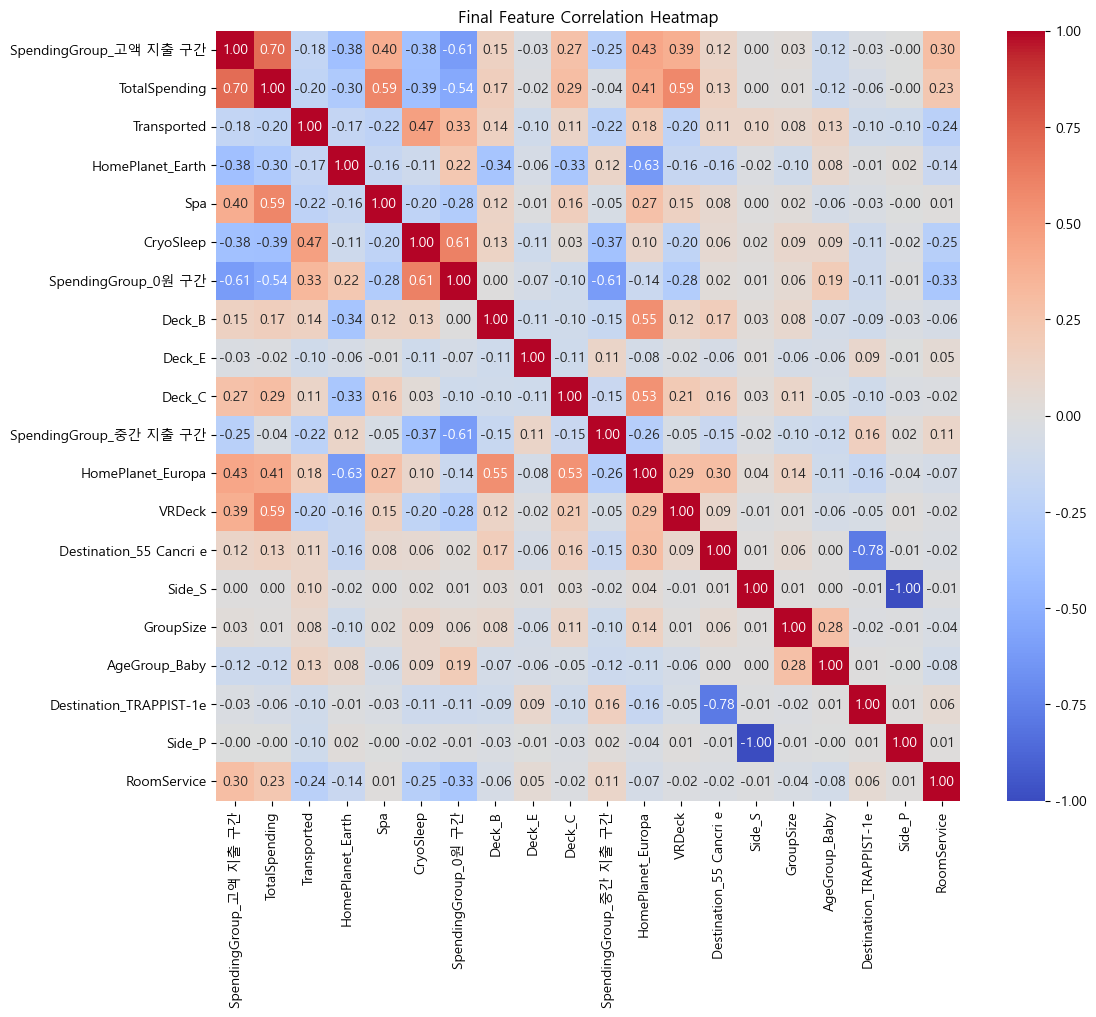

In [106]:
# 전처리가 완료된 all_data에서 다시 train_df를 추출합니다.
train_df = all_data[:train_row].copy()

# 정답지(Transported) 다시 합쳐주기 
if 'Transported' not in train_df.columns:
    # 원본 데이터의 Transported 열을 다시 붙여줍니다.
    train_df['Transported'] = pd.read_csv('train.csv')['Transported'].values

# 이제 상관관계 계산
corr_matrix = train_df.corr(numeric_only=True)

top_corr = corr_matrix['Transported'].sort_values(ascending=False)
top_features = top_corr.head(10).index.tolist() + top_corr.tail(10).index.tolist()
top_features = list(set(top_features)) 

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Final Feature Correlation Heatmap')
plt.show()

모델의 타겟인 Transported와 가장 상관관계가 높은 변수는 **IsSleepZero(0.48)**와 **CryoSleep(0.47)**입니다. 이는 동면 상태인 승객이 위급 상황 발생 시 대피하기 어려웠을 것이라는 데이터상의 근거가 되며, 모델이 실종 여부를 판단하는 데 가장 결정적인 힌트가 되었습니다.<br>특히 SpendingGroup이나 IsSleepZero 같이 새로 만든 특성들이 기존의 원본 데이터보다 Transported와 더 유의미한 상관관계를 보이고 있어, 변수 생성(Feature Engineering)이 모델 성능 향상에 기여했음을 알 수 있습니다.

<a id="model_section"></a>
# **머신러닝 모델 구축 및 평가**

In [107]:
from sklearn.ensemble import RandomForestClassifier     
from xgboost import XGBClassifier                       
from lightgbm import LGBMClassifier                     

from catboost import CatBoostClassifier                  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.linear_model import LogisticRegression     

from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import KFold, cross_val_score

In [108]:
print(X_train.head())

      CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
2333          0 -0.051627    0     -0.34029  -0.246745     -0.292365   
2589          0 -0.824185    0     -0.34029   0.480306     -0.239295   
8302          1 -0.051627    0     -0.34029  -0.281822     -0.292365   
8177          0 -0.613487    0     -0.34029  -0.280547      0.202387   
500           1  0.510234    0     -0.34029  -0.281822     -0.292365   

           Spa  VRDeck  TotalSpending       Num  ...  Deck_A  Deck_B  Deck_C  \
2333  0.316686 -0.2571      -0.257269 -0.988143  ...       0       1       0   
2589 -0.269707 -0.2571      -0.073816 -0.055017  ...       0       0       0   
8302 -0.269707 -0.2571      -0.510541 -0.534243  ...       0       0       1   
8177  0.602731 -0.2571      -0.059211  2.331372  ...       0       0       0   
500  -0.269707 -0.2571      -0.510541 -1.140093  ...       0       0       1   

      Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
2333       0       0   

In [109]:
print(X.isnull().sum().sum())

0


In [110]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6954 non-null   int32  
 1   Age                        6954 non-null   float64
 2   VIP                        6954 non-null   int32  
 3   RoomService                6954 non-null   float64
 4   FoodCourt                  6954 non-null   float64
 5   ShoppingMall               6954 non-null   float64
 6   Spa                        6954 non-null   float64
 7   VRDeck                     6954 non-null   float64
 8   TotalSpending              6954 non-null   float64
 9   Num                        6954 non-null   float64
 10  GroupSize                  6954 non-null   float64
 11  FamilySize                 6954 non-null   float64
 12  HomePlanet_Earth           6954 non-null   int32  
 13  HomePlanet_Europa          6954 non-null   int32  

In [111]:
# 모델 오류날 경우
# 전처리가 끝난 all_data에서 훈련 데이터 추출
# X = all_data[:train_row].copy()
# y = train_df['Transported'] # 원본에서 정답 가져오기

# 범주형 변수를 숫자로 변환 (이게 안 되어 있으면 0.78에서 멈춥니다)
# X = pd.get_dummies(X) 

# 모델에 넣을 최종 데이터 준비
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print("데이터 재구축 완료. 이제 다시 돌려보세요!")

### 수정 전 결과

## 베이스라인 모델

In [112]:
# 고정값 설정
SEED = 42

# K-Fold 객체 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

# 비교할 5개 모델 설정 (모두 random_state 고정)
models = {
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "XGBoost": XGBClassifier(random_state=SEED, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=SEED),
    "CatBoost": CatBoostClassifier(random_state=SEED, verbose=0, allow_writing_files=False),
    "GBM": GradientBoostingClassifier(random_state=SEED)
}

# 검증 결과 저장
final_results = []

print("5개 모델 교차 검증")

for name, model in models.items():
    # K-Fold 교차 검증 실행
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    
    final_results.append({
        'Model': name, 
        'CV_Mean': mean_score, 
        'CV_Std': std_score
    })
    
    print(f"✅ {name:15} 완료 | 평균 정확도: {mean_score:.4f} | 표준편차: {std_score:.4f}")

# 최종 성적표 출력 (평균 정확도 순)
performance_df = pd.DataFrame(final_results).sort_values(by='CV_Mean', ascending=False)

print("\n" + "="*50)
print("             [ 최종 모델 순위표 ]")
print("="*50)
print(performance_df.reset_index(drop=True))
print("="*50)

5개 모델 교차 검증
✅ Random Forest   완료 | 평균 정확도: 0.8007 | 표준편차: 0.0081
✅ XGBoost         완료 | 평균 정확도: 0.7968 | 표준편차: 0.0068
✅ LightGBM        완료 | 평균 정확도: 0.8087 | 표준편차: 0.0117
✅ CatBoost        완료 | 평균 정확도: 0.8135 | 표준편차: 0.0110
✅ GBM             완료 | 평균 정확도: 0.8060 | 표준편차: 0.0080

             [ 최종 모델 순위표 ]
           Model   CV_Mean    CV_Std
0       CatBoost  0.813487  0.010958
1       LightGBM  0.808742  0.011711
2            GBM  0.806009  0.008035
3  Random Forest  0.800689  0.008142
4        XGBoost  0.796807  0.006846


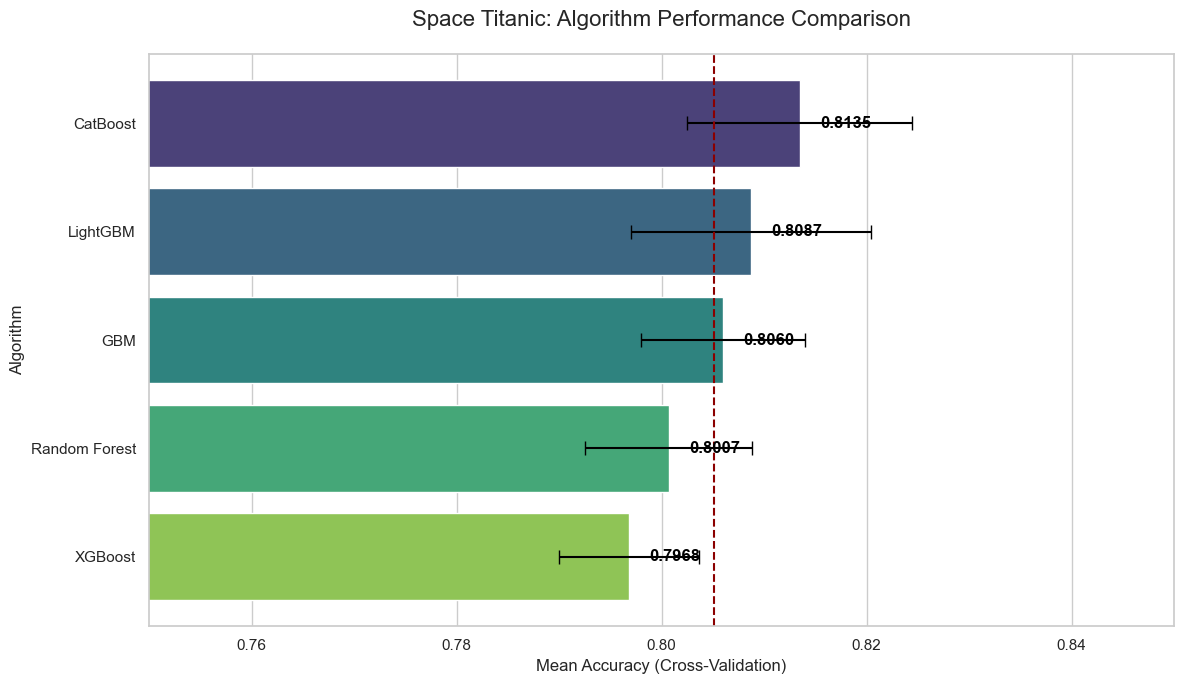

In [113]:
# 시각화
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='CV_Mean', 
    y='Model', 
    data=performance_df, 
    hue='Model', 
    palette='viridis', 
    legend=False
)

# 오차 막대(Error Bar) 표시
plt.errorbar(
    x=performance_df['CV_Mean'], 
    y=range(len(performance_df)), 
    xerr=performance_df['CV_Std'], 
    fmt='none', c='black', capsize=5
)

# 기준선 (전체 평균 점수) 추가
plt.axvline(performance_df['CV_Mean'].mean(), color='darkred', linestyle='--', label='Average')

# 각 막대 끝에 점수 텍스트 표시
for i, v in enumerate(performance_df['CV_Mean']):
    ax.text(v + 0.002, i, f'{v:.4f}', color='black', va='center', fontweight='bold')

plt.title('Space Titanic: Algorithm Performance Comparison', fontsize=16, pad=20)
plt.xlabel('Mean Accuracy (Cross-Validation)', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)
plt.xlim(0.75, 0.85)

plt.tight_layout()
plt.show()

## 하이퍼파라미터 튜닝

### CatBoost

0.8190점

In [114]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    # 탐색할 파라미터 범위(수색 범위) 설정
    param = {
        # 트리의 개수: 너무 많으면 오래 걸리고, 적으면 학습이 덜 됨
        'iterations': trial.suggest_int('iterations', 500, 1500),
        # 트리의 깊이: 4~10 사이가 가장 안정적
        'depth': trial.suggest_int('depth', 4, 10),
        # 학습률: log=True는 0.01~0.1 사이를 더 정밀하게 살피게 함
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        # 과적합 방지용 규제 파라미터
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        # 수치형 변수를 나누는 구간의 수
        'border_count': trial.suggest_int('border_count', 32, 255),
        
        # 고정 파라미터 (수사 기본 설정)
        'random_state': 42,
        'verbose': 0,
        'allow_writing_files': False
    }
    
    # 모델 설정
    model = CatBoostClassifier(**param)
    
    # 교차 검증 점수 계산
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    
    # 5개의 폴드 점수 평균을 반환
    return score.mean()

# Optuna로 최적화
study_cat = optuna.create_study(direction='maximize')
# n_trials=100: 100번의 서로 다른 조합을 시도.
study_cat.optimize(objective, n_trials=100)

# 결과
print(f"catboost 최적의 정확도: {study_cat.best_value:.4f}")
print(f"최적의 파라미터: {study_cat.best_params}")

# 베스트 CatBoost 저장
best_cat = CatBoostClassifier(**study_cat.best_params, random_state=42, verbose=0, allow_writing_files=False)
best_cat.fit(X_train, y_train)

[I 2026-02-12 16:32:44,738] A new study created in memory with name: no-name-55976560-cfc6-48e7-a404-94cea2fe060a
[I 2026-02-12 16:33:01,911] Trial 0 finished with value: 0.806584259551381 and parameters: {'iterations': 802, 'depth': 9, 'learning_rate': 0.03826685821411832, 'l2_leaf_reg': 0.20279742353198782, 'border_count': 219}. Best is trial 0 with value: 0.806584259551381.
[I 2026-02-12 16:33:32,152] Trial 1 finished with value: 0.8085975102017594 and parameters: {'iterations': 1295, 'depth': 10, 'learning_rate': 0.025718475720338262, 'l2_leaf_reg': 0.43692285497728717, 'border_count': 37}. Best is trial 1 with value: 0.8085975102017594.
[I 2026-02-12 16:33:39,748] Trial 2 finished with value: 0.8108985306363105 and parameters: {'iterations': 1106, 'depth': 6, 'learning_rate': 0.025799500370773092, 'l2_leaf_reg': 0.11760708325207796, 'border_count': 68}. Best is trial 2 with value: 0.8108985306363105.
[I 2026-02-12 16:33:48,738] Trial 3 finished with value: 0.80989257767043 and par

catboost 최적의 정확도: 0.8184
최적의 파라미터: {'iterations': 1265, 'depth': 4, 'learning_rate': 0.012281791294929801, 'l2_leaf_reg': 0.02750267080454122, 'border_count': 144}


### LightGBM

0.8131점

In [115]:
def objective_lgbm(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 1024),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        
        # 규제 (L1, L2)
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        
        'random_state': 42,
        'verbose': -1,
        'importance_type': 'gain' 
    }
    
    model = LGBMClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    
    return score.mean()
    
# Optuna로 최적화
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=150)

# 결과
print(f"LightGBM 최적의 정확도: {study_lgbm.best_value:.4f}")
print(f"최적의 파라미터: {study_lgbm.best_params}")

# 베스트 LightGBM 저장
best_lgbm = LGBMClassifier(**study_lgbm.best_params, random_state=42)
best_lgbm.fit(X_train, y_train)

[I 2026-02-12 16:51:24,575] A new study created in memory with name: no-name-2b9183e3-6252-4f18-a28a-6844c6b515a5
[I 2026-02-12 16:51:54,756] Trial 0 finished with value: 0.8029898266864581 and parameters: {'n_estimators': 1124, 'learning_rate': 0.015281848917554255, 'max_depth': 12, 'num_leaves': 961, 'min_child_samples': 27, 'feature_fraction': 0.45826469451690277, 'bagging_fraction': 0.6390423816066588, 'bagging_freq': 3, 'lambda_l1': 0.025752935325773448, 'lambda_l2': 0.0008296105434279372}. Best is trial 0 with value: 0.8029898266864581.
[I 2026-02-12 16:52:01,638] Trial 1 finished with value: 0.8009770932355481 and parameters: {'n_estimators': 600, 'learning_rate': 0.01132626437154804, 'max_depth': 3, 'num_leaves': 427, 'min_child_samples': 94, 'feature_fraction': 0.6869070700624753, 'bagging_fraction': 0.6952163987846469, 'bagging_freq': 3, 'lambda_l1': 9.724244450006468, 'lambda_l2': 8.357201463902703e-06}. Best is trial 0 with value: 0.8029898266864581.
[I 2026-02-12 16:52:15,

LightGBM 최적의 정확도: 0.8139
최적의 파라미터: {'n_estimators': 1496, 'learning_rate': 0.0059035494428635905, 'max_depth': 9, 'num_leaves': 453, 'min_child_samples': 88, 'feature_fraction': 0.4452629808007423, 'bagging_fraction': 0.6271726014744675, 'bagging_freq': 3, 'lambda_l1': 5.643924452525778e-08, 'lambda_l2': 0.04620896508521201}
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagg

,boosting_type,'gbdt'
,num_leaves,453
,max_depth,9
,learning_rate,0.0059035494428635905
,n_estimators,1496
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,88


### XGBoost

0.8112점

In [116]:
import xgboost as xgb

def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = xgb.XGBClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    return score.mean()

# Optuna로 최적화
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

# 결과
print(f"XGBoost 최적의 정확도: {study_xgb.best_value:.4f}")

# 베스트 XGBoost 저장
best_xgb = xgb.XGBClassifier(
    **study_xgb.best_params, 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

[I 2026-02-12 17:26:59,320] A new study created in memory with name: no-name-0664c0fb-d54d-4893-9c3a-c0f93f93a2fb
[I 2026-02-12 17:27:03,371] Trial 0 finished with value: 0.8038536532384445 and parameters: {'n_estimators': 880, 'max_depth': 10, 'learning_rate': 0.03014363872389231, 'subsample': 0.8451048167738744, 'colsample_bytree': 0.8064720243320898, 'gamma': 0.1415149456238755}. Best is trial 0 with value: 0.8038536532384445.
[I 2026-02-12 17:27:06,618] Trial 1 finished with value: 0.8016964142560861 and parameters: {'n_estimators': 1313, 'max_depth': 7, 'learning_rate': 0.054161078500298415, 'subsample': 0.9689990328016109, 'colsample_bytree': 0.558156254070141, 'gamma': 0.009218157987892016}. Best is trial 0 with value: 0.8038536532384445.
[I 2026-02-12 17:27:08,730] Trial 2 finished with value: 0.810754956063905 and parameters: {'n_estimators': 1079, 'max_depth': 4, 'learning_rate': 0.012466374353792876, 'subsample': 0.733751168739222, 'colsample_bytree': 0.5289503290360744, 'ga

XGBoost 최적의 정확도: 0.8108


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5289503290360744
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### Random Forest

0.8097점

In [117]:
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    return score.mean()

# Optuna로 최적화
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print(f"Random Forest 최적의 정확도: {study_rf.best_value:.4f}")

# 베스트 RandomForest 저장
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train, y_train)

[I 2026-02-12 17:32:34,347] A new study created in memory with name: no-name-013d6660-a6f8-470d-b6aa-38cb1f396b51
[I 2026-02-12 17:32:40,741] Trial 0 finished with value: 0.8028464589938402 and parameters: {'n_estimators': 350, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 0.6345842715849687}. Best is trial 0 with value: 0.8028464589938402.
[I 2026-02-12 17:33:06,530] Trial 1 finished with value: 0.8025579651304119 and parameters: {'n_estimators': 890, 'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.9728478915369501}. Best is trial 0 with value: 0.8028464589938402.
[I 2026-02-12 17:33:19,564] Trial 2 finished with value: 0.8039961934119131 and parameters: {'n_estimators': 639, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5348571879885309}. Best is trial 2 with value: 0.8039961934119131.
[I 2026-02-12 17:33:24,646] Trial 3 finished with value: 0.8028467693135211 and parameters: {'n_

Random Forest 최적의 정확도: 0.8085


,n_estimators,579
,criterion,'gini'
,max_depth,26
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,0.2780571969218446
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### GBM

0.8102점

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

def objective_gbm(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500), # 너무 많으면 매우 느려집니다.
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0), # 무작위성 추가 (과적합 방지)
        'random_state': 42
    }
    
    model = GradientBoostingClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    return score.mean()

# Optuna로 최적화
study_gbm = optuna.create_study(direction='maximize')
study_gbm.optimize(objective_gbm, n_trials=50)

print(f"GBM 최적의 정확도: {study_gbm.best_value:.4f}")

# 베스트 GBM 저장
best_gbm_tuned = GradientBoostingClassifier(**study_gbm.best_params, random_state=42)
best_gbm_tuned.fit(X_train, y_train)

[I 2026-02-12 17:37:51,316] A new study created in memory with name: no-name-35fbc95f-8117-4b3c-8eaa-a9889153ebb8


[I 2026-02-12 17:38:22,682] Trial 0 finished with value: 0.8064410987385505 and parameters: {'n_estimators': 488, 'learning_rate': 0.016940463485635826, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 5, 'subsample': 0.8502266836099124}. Best is trial 0 with value: 0.8064410987385505.
[I 2026-02-12 17:38:26,526] Trial 1 finished with value: 0.8054354560923512 and parameters: {'n_estimators': 178, 'learning_rate': 0.09563120331206619, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 2, 'subsample': 0.7337673631163459}. Best is trial 0 with value: 0.8064410987385505.
[I 2026-02-12 17:38:34,416] Trial 2 finished with value: 0.8065843629912749 and parameters: {'n_estimators': 323, 'learning_rate': 0.03159807337795282, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 8, 'subsample': 0.6578332216185097}. Best is trial 2 with value: 0.8065843629912749.
[I 2026-02-12 17:38:44,484] Trial 3 finished with value: 0.8075916606757728 and parameters: {'n_estimator

GBM 최적의 정확도: 0.8103


,loss,'log_loss'
,learning_rate,0.013031905353920157
,n_estimators,295
,subsample,0.6028508947352926
,criterion,'friedman_mse'
,min_samples_split,12
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_depth,8
,min_impurity_decrease,0.0
,init,None


### 최종 앙상블

가장 높은 점수가 나오는 최적의 앙상블을 찾기 위해 여러 조합으로 시도해봤습니다.

소프트 보팅

5개 모델 전체 소프트 보팅 방식으로 앙상블 : 0.8120점

In [119]:
from sklearn.ensemble import VotingClassifier
# 5개의 베스트 모델 앙상블(소프트 보팅)
final_ensemble_soft_5 = VotingClassifier(
    estimators=[
        ('cat', best_cat),
        ('lgbm', best_lgbm),
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('gbm', best_gbm_tuned)
    ],
    voting='soft'
)

# 최종 모델 학습
final_ensemble_soft_5.fit(X_train, y_train)

final_soft_score_5 = cross_val_score(final_ensemble_soft_5, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f"최종 앙상블 점수: {final_soft_score_5.mean():.4f}")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be

c:\Users\User\miniconda3\envs\DS\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:47:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


최종 앙상블 점수: 0.8133


최고 점수 3개 모델만 소프트 보팅 방식으로 앙상블 : 0.8123점

In [120]:
# 모델 3개만 앙상블(소프트 보팅)
final_ensemble_soft_3 = VotingClassifier(
    estimators=[
        ('cat', best_cat),
        ('lgbm', best_lgbm),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

# 학습 및 점수 확인
final_ensemble_soft_3.fit(X_train, y_train)
final_soft_score_3 = cross_val_score(final_ensemble_soft_3, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
print(f"최종 앙상블 점수: {final_soft_score_3.mean():.4f}")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be

c:\Users\User\miniconda3\envs\DS\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:49:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


최종 앙상블 점수: 0.8118


5개 모델 소프트 보팅에서 가중치 방식(CatBoost에게 높은 가중치)으로 앙상블 : 0.8133점

In [121]:
# 가중치 앙상블(소프트 보팅)
final_ensemble_soft_weighted = VotingClassifier(
    estimators=[
        ('cat', best_cat),
        ('lgbm', best_lgbm),
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('gbm', best_gbm_tuned)
    ],
    voting='soft',
    # CatBoost에게 더 큰 권한(2)을 주고, 나머지는 (1)만 줍니다.
    weights=[2, 1, 1, 1, 1] 
)

# 학습 및 점수 확인
final_ensemble_soft_weighted.fit(X_train, y_train)
soft_weighted_score = cross_val_score(final_ensemble_soft_weighted, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
print(f"가중치 앙상블 점수: {soft_weighted_score.mean():.4f}")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be

c:\Users\User\miniconda3\envs\DS\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:49:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


가중치 앙상블 점수: 0.8138


하드 보팅

5개 모델 전체 하드 보팅 방식으로 앙상블 : 0.8139점

In [122]:
# 5개의 베스트 모델 앙상블(하드 보팅)
final_ensemble_hard_5 = VotingClassifier(
    estimators=[
        ('cat', best_cat),
        ('lgbm', best_lgbm),
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('gbm', best_gbm_tuned)
    ],
    voting='hard'
)

# 최종 모델 학습
final_ensemble_hard_5.fit(X_train, y_train)

final_hard_score_5 = cross_val_score(final_ensemble_hard_5, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f"최종 앙상블 점수: {final_hard_score_5.mean():.4f}")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be

c:\Users\User\miniconda3\envs\DS\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:50:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


최종 앙상블 점수: 0.8154


최고 점수 3개 모델만 하드 보팅 방식으로 앙상블 : 0.8141점

In [123]:
# 모델 3개만 앙상블(하드 보팅)
final_ensemble_hard_3 = VotingClassifier(
    estimators=[
        ('cat', best_cat),
        ('lgbm', best_lgbm),
        ('xgb', best_xgb)
    ],
    voting='hard'
)

# 학습 및 점수 확인
final_ensemble_hard_3.fit(X_train, y_train)
final_ensemble_hard_3_score = cross_val_score(final_ensemble_hard_3, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
print(f"최종 앙상블 점수: {final_ensemble_hard_3_score.mean():.4f}")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be

c:\Users\User\miniconda3\envs\DS\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:51:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


최종 앙상블 점수: 0.8151


5개 모델 하드 보팅에서 가중치 방식(CatBoost에게 높은 가중치)으로 앙상블 : 0.8156점

In [124]:
# 가중치 앙상블(하드 보팅)
final_ensemble_hard_weighted = VotingClassifier(
    estimators=[
        ('cat', best_cat),
        ('lgbm', best_lgbm),
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('gbm', best_gbm_tuned)
    ],
    voting='hard',
    # CatBoost에게 더 큰 권한(2)을 주고, 나머지는 (1)만 줍니다.
    weights=[2, 1, 1, 1, 1] 
)

# 학습 및 점수 확인
final_ensemble_hard_weighted.fit(X_train, y_train)
hard_weighted_score = cross_val_score(final_ensemble_hard_weighted, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
print(f"가중치 앙상블 점수: {hard_weighted_score.mean():.4f}")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be

c:\Users\User\miniconda3\envs\DS\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:53:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


가중치 앙상블 점수: 0.8154


### AutoGluon

결과가 나오긴 했으나 AutoGluon은 전처리 과정이 필요하지 않기에, 별도의 Spaceship_autogluon2.jpynb 파일에서 다시 학습하여 제출하였습니다.

In [125]:
# from autogluon.tabular import TabularPredictor

# 학습 데이터 준비 (Label 컬럼이 포함된 전체 데이터프레임)
# train_data = train_df

# label: 예측할 타겟 컬럼명
# eval_metric: 평가 기준 
# presets: 'best_quality'는 시간이 좀 걸리지만 최고 점수를 뽑아냅니다.
# predictor_3600 = TabularPredictor(
#     label='Transported', 
#     eval_metric='accuracy',
#     path='AutogluonModels/ag-3600s-final'
# ).fit(
#     train_data, 
#     presets='best_quality', 
#     time_limit=3600,
#     num_stack_levels=2,
#     num_bag_folds=10,
#     excluded_model_types=['FASTAI']
# )

# 결과 확인
# leaderboard_3600 = predictor_3600.leaderboard(train_data, silent=True)
# print(leaderboard_3600)

<a id=submission_section></a>
# **제출**

케글에서 가장 높은 점수를 받기 위해 보팅 방식 별로, 혹은 단일 모델로 제출하였습니다.

5개 모델 전체 소프트 보팅 방식으로 앙상블 : 0.8120점, 케글 점수 : 0.80313점

In [126]:
# 학습된 소프트 보팅 모델로 예측 수행
y_pred_soft = final_ensemble_soft_5.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_soft = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_soft.astype(bool)
})

file_name = '04-Tuned_Soft_Voting.csv'
submission_soft.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
✅ '04-Tuned_Soft_Voting.csv' 저장 완료


최고 점수 3개 모델만 소프트 보팅 방식으로 앙상블 : 0.8123점, 케글 점수 : 0.80360점

In [127]:
y_pred_soft_3 = final_ensemble_soft_3.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_soft_3 = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_soft_3.astype(bool)
})

file_name = 'Tuned_Soft_Voting_3.csv'
submission_soft_3.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
✅ 'Tuned_Soft_Voting_3.csv' 저장 완료


5개 모델 소프트 보팅에서 가중치 방식(CatBoost에게 높은 가중치)으로 앙상블 : 0.8133점, 케글 점수 : 0.80593점

In [128]:
y_pred_soft_weighted = final_ensemble_soft_weighted.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_soft_weighted = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_soft_weighted.astype(bool)
})

file_name = 'Tuned_Soft_Voting_weighted.csv'
submission_soft_weighted.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
✅ 'Tuned_Soft_Voting_weighted.csv' 저장 완료


5개 모델 전체 하드 보팅 방식으로 앙상블 : 0.8139점, 케글 점수 : 0.80313점

In [129]:
# 1. 학습된 하드 보팅 모델로 예측 수행
y_pred_hard = final_ensemble_hard_5.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_hard = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_hard.astype(bool)
})

file_name = 'Tuned_Hard_Voting_5.csv'
submission_hard.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
✅ 'Tuned_Hard_Voting_5.csv' 저장 완료


최고 점수 3개 모델만 하드 보팅 방식으로 앙상블 : 0.8141점, 케글 점수 : 0.80476점

In [130]:
y_pred_hard_3 = final_ensemble_hard_3.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_hard_3 = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_hard_3.astype(bool)
})

file_name = 'Tuned_Hard_Voting_3.csv'
submission_hard_3.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
✅ 'Tuned_Hard_Voting_3.csv' 저장 완료


5개 모델 하드 보팅에서 가중치 방식(CatBoost에게 높은 가중치)으로 앙상블 : 0.8156점, 케글 점수 : 0.80640점

In [131]:
y_pred_hard_weighted = final_ensemble_hard_weighted.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_hard_weighted = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_hard_weighted.astype(bool)
})

file_name = 'Tuned_Hard_Voting_weighted.csv'
submission_hard_weighted.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

[LightGBM] [Warning] feature_fraction is set=0.4452629808007423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4452629808007423
[LightGBM] [Warning] lambda_l1 is set=5.643924452525778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.643924452525778e-08
[LightGBM] [Warning] lambda_l2 is set=0.04620896508521201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04620896508521201
[LightGBM] [Warning] bagging_fraction is set=0.6271726014744675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271726014744675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
✅ 'Tuned_Hard_Voting_weighted.csv' 저장 완료


CatBoost 단일 모델 : 0.8195점, 케글 점수 : 0.80710점

In [132]:
y_pred_best_cat = best_cat.predict(test_final)

import pandas as pd
test_id = pd.read_csv('test.csv')['PassengerId']

submission_best_cat = pd.DataFrame({
    'PassengerId': test_id,
    'Transported': y_pred_best_cat.astype(bool)
})

file_name = '06-Optuna_Best_CatBoost.csv'
submission_best_cat.to_csv(file_name, index=False)

print(f"✅ '{file_name}' 저장 완료")

✅ '06-Optuna_Best_CatBoost.csv' 저장 완료
